# Space Brothers

## Table of contents

I. Data upload. Primary data analysis. Conclusions.


II. Data preprocessing.
 * missing values processing;
 * change of data type;
 * analysis of categorical variables (checking unique values for implicit duplicates);
 * analysis of numerical variables (event and advertising campaign dates, cost distribution histogram, user ID uniqueness);
 * interim conclusions;


III. Exploratory Data Analysis (EDA).

*Game Platform Analysis:* 
 * histogram of user activity (DAU) in dynamics, average indicators (per day);
 * histograms of the number of game events in the dynamics (general, by event type), average (per day, per player);
 * histograms of the number of buildings in the dynamics (general, by building type), average;
    
*User profiles creation:*

* selection features for user profiles: completion of target event (and its date), strategy (PvP, PvE), dates of first and last session, total game time, time to complete the target event;
    
*Features imaoct on the first level completion (target event):*
    
* the impact of the number of buildings (by acquisition channel);
* the impact of strategy, total game time and time to complete the target event;
    
*Cohort analysis.*
* retention rate (heatmap);
* retention curves (by date of acquisition, lifetime, target event, strategy, acquisition channel);
   
*Interim conclusions.*
    

IV. Advertising campaign. Monetization strategy.
* general analysis (duration, total amount), histograms by the acquisition channel;
* histograms of the total number of attracted users,  by the acquisition channel (dynamics);
* CAC calculation (averages  by the acquisition channel, CAC in dynamics);
    
*Development of monetization strategy and payback estimation.*
* LTV: heatmap, LTV curves (general,  by the acquisition channel, target event, game strategy);
* ROI:  by the acquisition channel;
* interim conclusions;   
    

V. Hypotheses testing.
* game time and strategy; 
* buildings number and acquisition channel; 
* interim conclusions;
    

VI. General conclusion and recommendations.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os
import functools as ft
from datetime import datetime, timedelta
from scipy import stats as st

# Data upload. Primary data analysis.

In [2]:
# reading the file and saving it to the variables
try:
    ad_costs = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/final/ad_costs.csv')
    game_actions = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/final/game_actions.csv')
    user_source = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/final/user_source.csv')
except:
    ad_costs = pd.read_csv('/datasets/ad_costs.csv')
    game_actions = pd.read_csv('/datasets/game_actions.csv')
    user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
# primary data analysis function
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(df.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(df.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [4]:
# primary data analysis
tables = [ad_costs, game_actions, user_source]
names = ['ad_costs', 'game_actions', 'user_source']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;47m_____________SET:  {name.upper()}_____________\033[0;0m\n')
    get_info(table)
    print ('\n\033[01;30;47m_____________THE END_____________\033[0;0m\n\n') 


_____________SET:  AD_COSTS_____________

 Total number of rows:  28 rows
 
 Total number of columns:  3 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 4.2 KB
None

 Top 5 rows: 


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796



 Last 5 rows: 


,source,day,cost
23,youtube_channel_reklama,2020-05-05,147.041741
24,youtube_channel_reklama,2020-05-06,88.506074
25,youtube_channel_reklama,2020-05-07,55.740645
26,youtube_channel_reklama,2020-05-08,40.217907
27,youtube_channel_reklama,2020-05-09,23.314669



 Missing values ratio: 
source    0.0
day       0.0
cost      0.0
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
source,28,4,facebook_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,28,7,2020-05-03,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost,28.0,NaN,NaN,NaN,271.556321,286.86765,23.314669,58.629039,111.396488,160.056443,196.548324,483.445248,969.139394



_____________THE END_____________



_____________SET:  GAME_ACTIONS_____________

 Total number of rows:  135640 rows
 
 Total number of columns:  5 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 43.1 MB
None

 Top 5 rows: 


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



 Last 5 rows: 


,event_datetime,event,building_type,user_id,project_type
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN



 Missing values ratio: 
event_datetime     0.00
event              0.00
building_type      5.66
user_id            0.00
project_type      98.62
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq
event_datetime,135640,128790,2020-05-09 12:35:56,4
event,135640,3,building,127957
building_type,127957,3,spaceport,59325
user_id,135640,13576,bf542075-e3a2-4e79-82d8-3838e86d2a25,22
project_type,1866,1,satellite_orbital_assembly,1866



_____________THE END_____________



_____________SET:  USER_SOURCE_____________

 Total number of rows:  13576 rows
 
 Total number of columns:  2 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 2.2 MB
None

 Top 5 rows: 


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



 Last 5 rows: 


,user_id,source
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts
13575,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,facebook_ads



 Missing values ratio: 
user_id    0.0
source     0.0
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq
user_id,13576,13576,0001f83c-c6ac-4621-b7f0-8a28b283ac30,1
source,13576,4,yandex_direct,4817



_____________THE END_____________




In [5]:
# duplicates check
tables = [ad_costs, game_actions, user_source]
names = ['ad_costs', 'game_actions', 'user_source']

for name, table in zip(names, tables):
    print(table.duplicated().sum())

0
1
0


There's a duplicate row in the game_actions table. Let's drop it.

In [6]:
# drop duplicates
game_actions = game_actions.drop_duplicates()

**According to the documentation:**

*Set ad_costs:*      
- `day` - click day;
- `source`;
- `cost` - click cost;     

*Set game_actions:*    

- `event_datetime`;
- `event` — one of three types:
    1. `building` — the object was built,
    2. `finished_stage_1` — the first level is complete,
    3. `project` — the project is complete;
- `building_type` — one of three building types:
    1. `assembly_shop`,
    2. `spaceport`,
    3. `research_center`;
- `user_id`;
- `project_type`;        

*Set user_source:*

- `user_id`;
- `source` - acquisition channel;

## Interim conclusions
The app provided information on user performance at the first level. Completing the first level requires the player to fulfill one of two conditions:

- defeat an enemy;
- implement a project - development of an orbital set of satellites;

The dataset contains the data of the first users of the application - cohort of users who started using the app between May 4 and May 10 inclusive.  
In total, there are three tables that reflect basic information about user behaviour, the advertising campaign and the gaming platform. The data is incomplete (missing values), there is a mismatch of data type in the dates columns. There are no explicit duplicates.     
Number of profiles is 13576 (according to the users_source table ). There're 4 acquisition channels, the most popular is yandex_direct (4817 records). 

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to  change some data types, process missing values, analyze numerical and categorical variables.

# Data preprocessing

## Missing values processing

There're missing values in the game_actions table: columns `building_type` - 5.66%, `project_type` - 98.62%. 

In [7]:
# rows with NaN in building_type
game_actions[game_actions['building_type'].isnull()].info()
display(game_actions[game_actions['building_type'].isnull()].describe().T)
game_actions[game_actions['building_type'].isnull()]['event'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7683 entries, 6659 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  7683 non-null   object
 1   event           7683 non-null   object
 2   building_type   0 non-null      object
 3   user_id         7683 non-null   object
 4   project_type    1866 non-null   object
dtypes: object(5)
memory usage: 360.1+ KB


,count,unique,top,freq
event_datetime,7683,7663,2020-05-16 08:42:42,2
event,7683,2,finished_stage_1,5817
building_type,0,0,NaN,NaN
user_id,7683,5817,1669ef5e-8908-410f-b4d9-b29c7fb8ef65,2
project_type,1866,1,satellite_orbital_assembly,1866


array(['finished_stage_1', 'project'], dtype=object)

*Conclusion: missing values are due to finished_stage_1 and project events for which no building is required. Let's leave  them as they are.*

In [8]:
# rows with NaN in project_type
game_actions[game_actions['project_type'].isnull()].info()
display(game_actions[game_actions['project_type'].isnull()].describe().T)
game_actions[game_actions['project_type'].isnull()]['event'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133773 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  133773 non-null  object
 1   event           133773 non-null  object
 2   building_type   127956 non-null  object
 3   user_id         133773 non-null  object
 4   project_type    0 non-null       object
dtypes: object(5)
memory usage: 6.1+ MB


,count,unique,top,freq
event_datetime,133773,127004,2020-05-08 22:30:04,4
event,133773,2,building,127956
building_type,127956,3,spaceport,59325
user_id,133773,13576,bf542075-e3a2-4e79-82d8-3838e86d2a25,21
project_type,0,0,NaN,NaN


array(['building', 'finished_stage_1'], dtype=object)

*Conclusion: missing values refer to the building and the first level completion (PvP strategy) events, so the `project` field is NaN. No processing required.*

## Data type change

In [9]:
# dates to datetime
table_names = [ad_costs, game_actions]
column_names = ['day', 'event_datetime']

for table, column in zip(table_names, column_names):
    table[column] = pd.to_datetime(table[column], format='%Y-%m-%d')

# check
[table.info() for table in table_names]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


C:\Users\maslo\AppData\Local\Temp/ipykernel_45444/1770385482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[column] = pd.to_datetime(table[column], format='%Y-%m-%d')


[None, None]

## Categorical data processing

In [10]:
# unique values check
table_names = [ad_costs, game_actions, game_actions, game_actions, user_source]
column_names = ['source', 'event', 'building_type', 'project_type', 'source']

for table, column in zip(table_names, column_names):
    print(table[column].unique())

['facebook_ads' 'instagram_new_adverts' 'yandex_direct'
 'youtube_channel_reklama']
['building' 'finished_stage_1' 'project']
['assembly_shop' 'spaceport' nan 'research_center']
[nan 'satellite_orbital_assembly']
['facebook_ads' 'yandex_direct' 'youtube_channel_reklama'
 'instagram_new_adverts']


*Conclusion: no implicit duplicates.*       

Unique acquisition channels are: facebook, instagram, yandex and youtube.   
Unique events: building, finished_stage_1, project.  
Unique buildings: assembly_shop, spaceport, research_center.   
Project type: satellite_orbital_assembly.  

To facilitate the analysis of the acquisition channels and the correct display of the graphics, we will use short values: fb, instagram, yandex and youtube.  

In [11]:
# acquisition channels replacing
table_names = [ad_costs, user_source]
column_names = ['source', 'source']

for table, column in zip(table_names, column_names):
    table[column].replace({'facebook_ads':'fb', 'instagram_new_adverts':'instagram', 
                           'yandex_direct':'yandex','youtube_channel_reklama':'youtube'}, inplace=True)

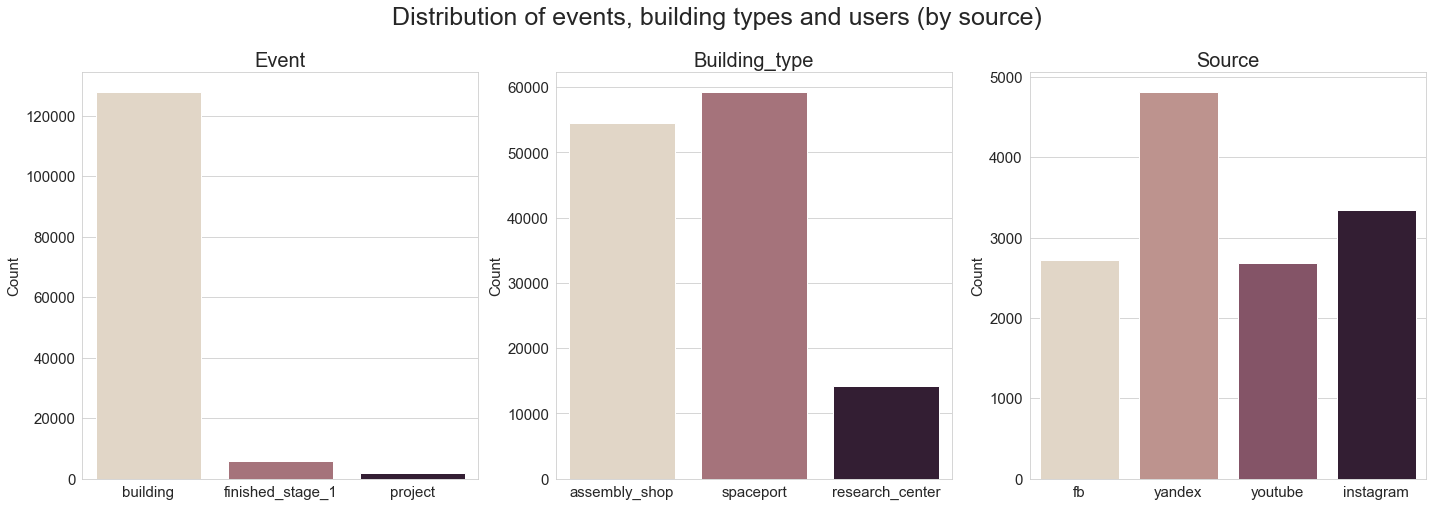

In [12]:
# unique values distribution
table_names = [game_actions, game_actions, user_source]
column_names = ['event', 'building_type', 'source']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of events, building types and users (by source)', fontsize=25, y=1)
for table, column, ax in zip(table_names, column_names, axs.ravel()):
    sns.countplot(data=table, x=column, palette="ch:.25", ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

*Conclusion: the prevailing event in the game - building (more than 120000 records), spaceport was built the most (almost 60000 events) then goes assembly_shop (approx. 55000 events). Most of the users (close to 5000) came from the yandex channel, the rest of the channels attracted between 2800 and 3000 players.*

## Numerical data processing

In [13]:
# dates check
print('Ad campaign start date:', ad_costs['day'].min())
print('Ad campaign end date:', ad_costs['day'].max())
print()
print('Event min date:', game_actions['event_datetime'].min())
print('Event max date:', game_actions['event_datetime'].max())

Ad campaign start date: 2020-05-03 00:00:00
Ad campaign end date: 2020-05-09 00:00:00

Event min date: 2020-05-04 00:00:01
Event max date: 2020-06-05 12:32:49


In [14]:
# synchronize campaign and event data (from May 4)
ad_costs['day'] = ad_costs['day'] + timedelta(days=1)

*Conclusion: the advertising campaign lasted 7 days. Game events were analyzed during a month.*

In [15]:
# add event date (to the game_actions) and cost date (to the ad_costs) columns
game_actions['event_dt'] = game_actions['event_datetime'].dt.date
ad_costs['dt'] = ad_costs['day'].dt.date

C:\Users\maslo\AppData\Local\Temp/ipykernel_45444/1601040087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_actions['event_dt'] = game_actions['event_datetime'].dt.date


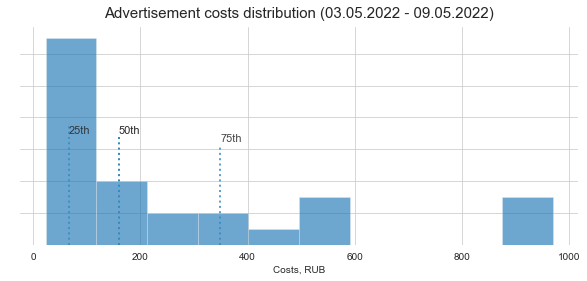

In [16]:
# ad costs distribution
fig, ax = plt.subplots(figsize = (10, 4))
plt.style.use('bmh')
ax.grid(False)
ad_costs['cost'].plot(kind = 'hist', alpha = 0.65)
ax.set_xlabel('Costs, RUB')
ax.set_ylabel(' ')
ax.set_title('Advertisement costs distribution (03.05.2022 - 09.05.2022)', 
             fontsize=15, pad=10)
ax.tick_params(left = False, labelleft = False)
quant_25, quant_50, quant_75 = ad_costs['cost'].quantile(0.25), ad_costs['cost'].quantile(0.5), ad_costs['cost'].quantile(0.75)
quants = [[quant_25, 0.8, 0.56], [quant_50, 1, 0.5],  [quant_75, 0.8, 0.46]]
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
plt.text(quant_25, 7, "25th", size = 11, alpha = 0.85)
plt.text(quant_50, 7, "50th", size = 11, alpha = 1)
plt.text(quant_75, 6.5, "75th", size = 11, alpha = 0.85)
for ax, spine in ax.spines.items():
    spine.set_visible(False);

*Conclusion: the distribution is exponential. On some campaign days, expenditures were considerably higher.* 

In [17]:
# check user IDs (uniqueness)
user_source.describe().T

,count,unique,top,freq
user_id,13576,13576,0001f83c-c6ac-4621-b7f0-8a28b283ac30,1
source,13576,4,yandex,4817


*Conclusion: all identifiers are unique.*

## Interim conclusions

During data preprocessing we:

- perfomed data type change (to the datetime type);
- validated the date columns (minimum and maximum values);
- analyzed distribution of expenses for advertising campaign;
- checked categorical data for implicit duplicates (uniqueness check);
- analyzed missing values (no processing required);

# Exploratory Data Analysis (EDA)

##  Game platform analysis

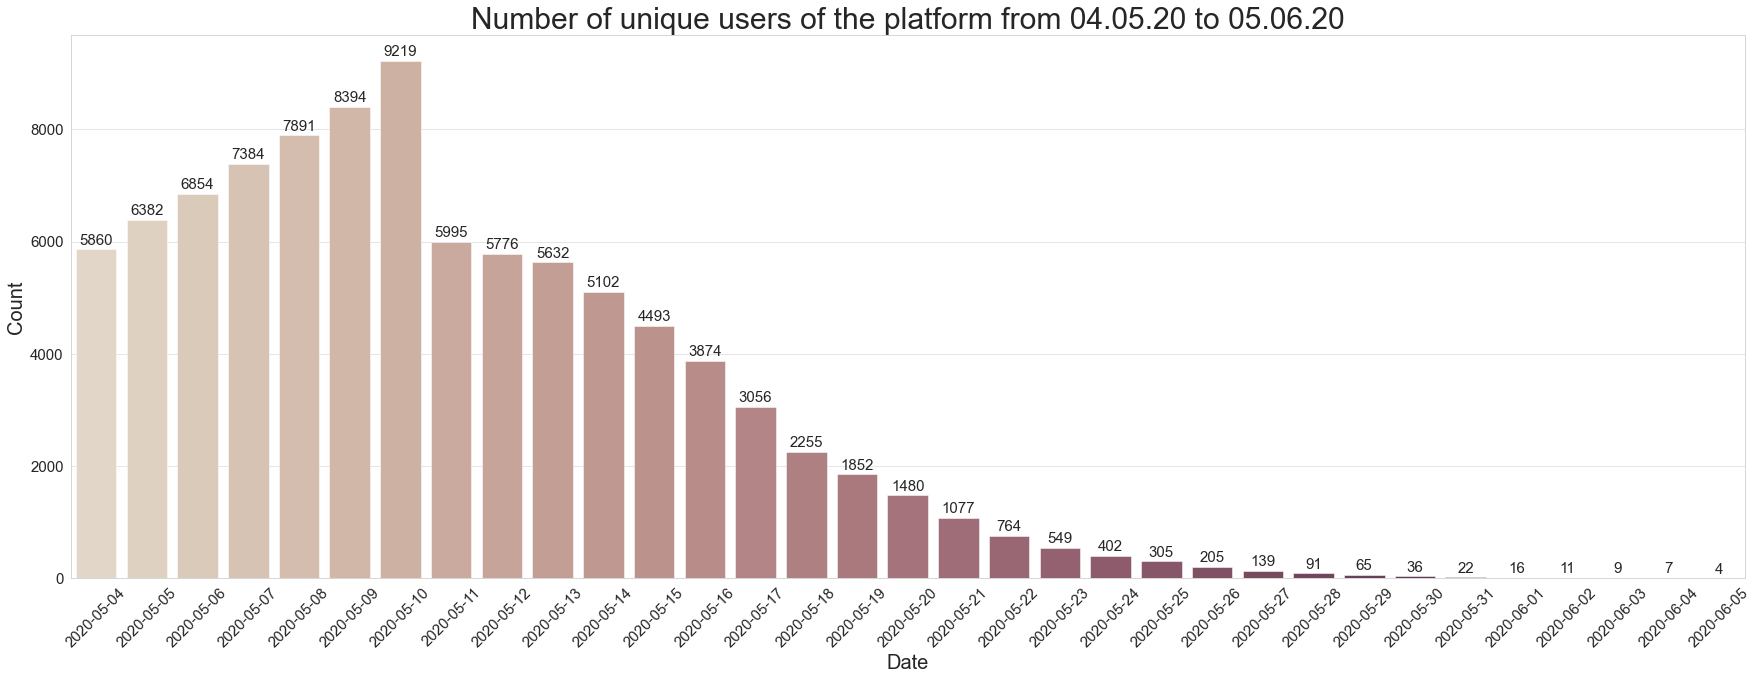

In [18]:
 # users activity on the platform (unique users) in dynamics
user_dynamics = game_actions.groupby('event_dt').agg({'user_id':'nunique'}).reset_index()
plt.figure(figsize=(30, 10))
sns.set_style('whitegrid')
plot = sns.barplot(data=user_dynamics, x='event_dt', y='user_id', palette="ch:.25")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=15)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Number of unique users of the platform from 04.05.20 to 05.06.20', fontsize=30)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15);

*Conclusion: the number of users increased during the ad campaign and then gratually decreased. At the end of the period analyzed, nearly all affected users are inactive. The maximum number of unique users is observed on the last day of the advertising campaign (10.05.2020) - 9219 unique users, the minimum on the last day of the analyzed period (05.06.2020) - 4 unique users.*

In [19]:
# average number of unique users per day
user_dynamics['user_id'].describe().to_frame()[1:2].T

,mean
user_id,2884.878788


*Conclusion: average number of unique users per day - 2884.*

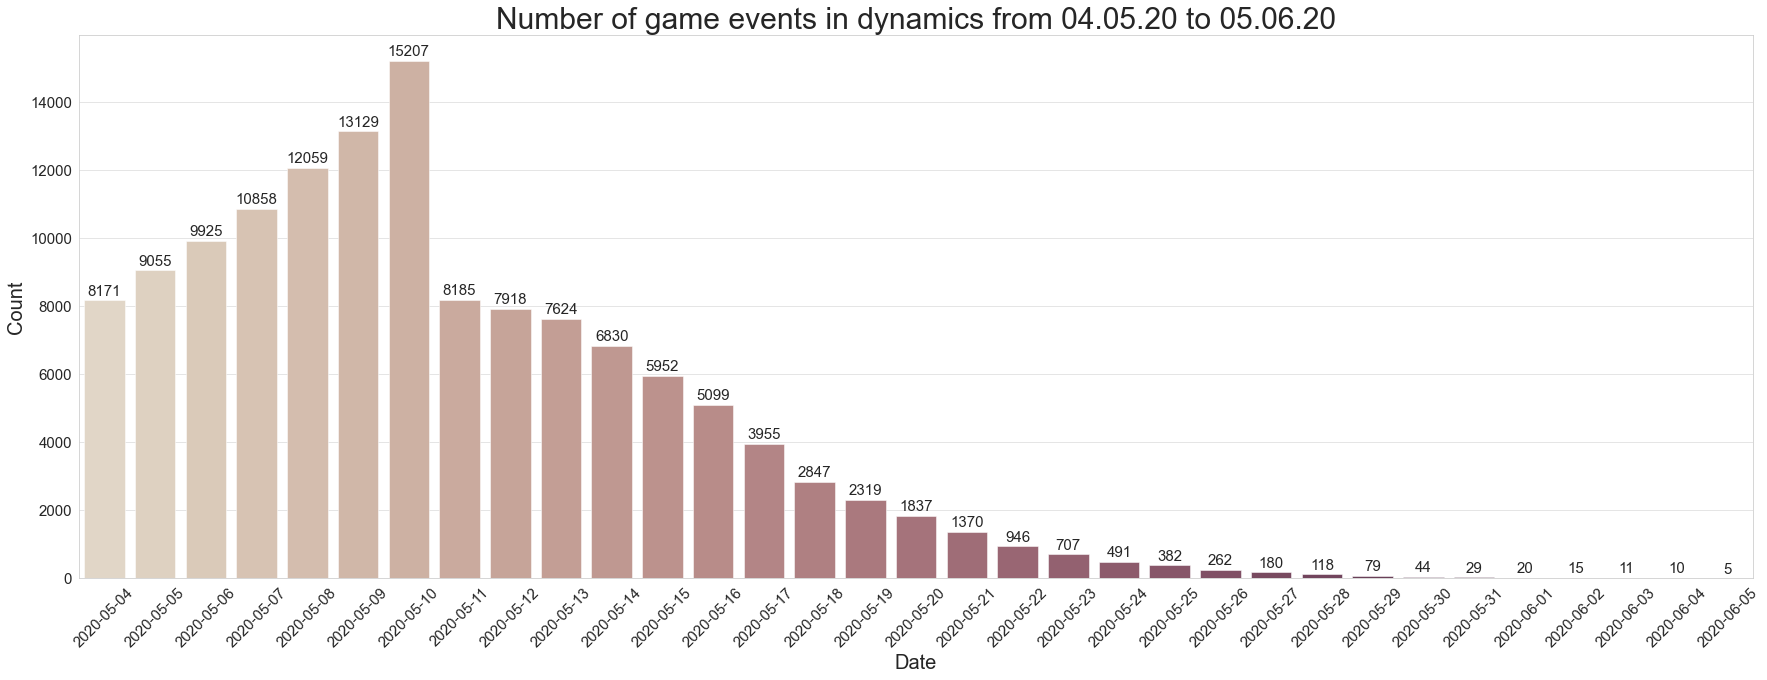

In [20]:
# number of game events in dynamics
actions_dynamics = game_actions.groupby('event_dt')['event'].agg('count').reset_index()
plt.figure(figsize=(30, 10))
plot = sns.barplot(data=actions_dynamics, x='event_dt', y='event', palette="ch:.25")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=15)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Number of game events in dynamics from 04.05.20 to 05.06.20', fontsize=30)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15);

*Conclusion: the curve of game events repeats the pattern of the unique users' dynamics: growth during the advertising campaign and a smooth decline after its end. The maximum is observed on the last day of the advertising campaign (10.05.2020) - 15208 events, the minimum on the last day of the analyzed period (05.06.2020) - 5 events.*

In [21]:
# average number of events per day
actions_dynamics['event'].describe().to_frame()[1:2].T

,mean
event,4110.272727


*Conclusion: average number of events per day - 4110 events.*

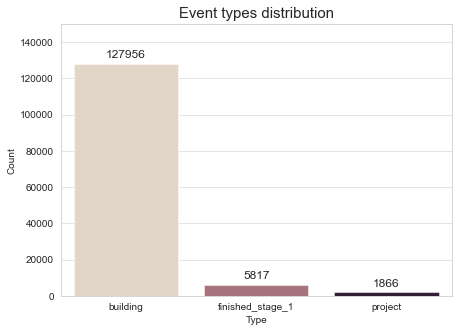

In [22]:
# event types distribution
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
plot = sns.countplot(data=game_actions, x='event', palette="ch:.25")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=12)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Event types distribution', fontsize=15)
plt.ylim(0, 150000);

*Conclusion: the most popular event in the game - building (127957 times), the first level completion - 5817 times, project implementation  - 1866 times.*

Let's analyze the dynamics for each event type:

In [23]:
# group by date and event type, count number of occurences
events_dynamics = game_actions.groupby(['event_dt', 'event']).agg({'event':'count'})
events_dynamics.columns = ['count']
events_dynamics = events_dynamics.reset_index().pivot_table('count', 'event_dt', 'event')
events_dynamics.head(3)

event,building,finished_stage_1,project
event_dt,,,
2020-05-04,8170.0,1.0,NaN
2020-05-05,9052.0,3.0,NaN
2020-05-06,9921.0,4.0,NaN


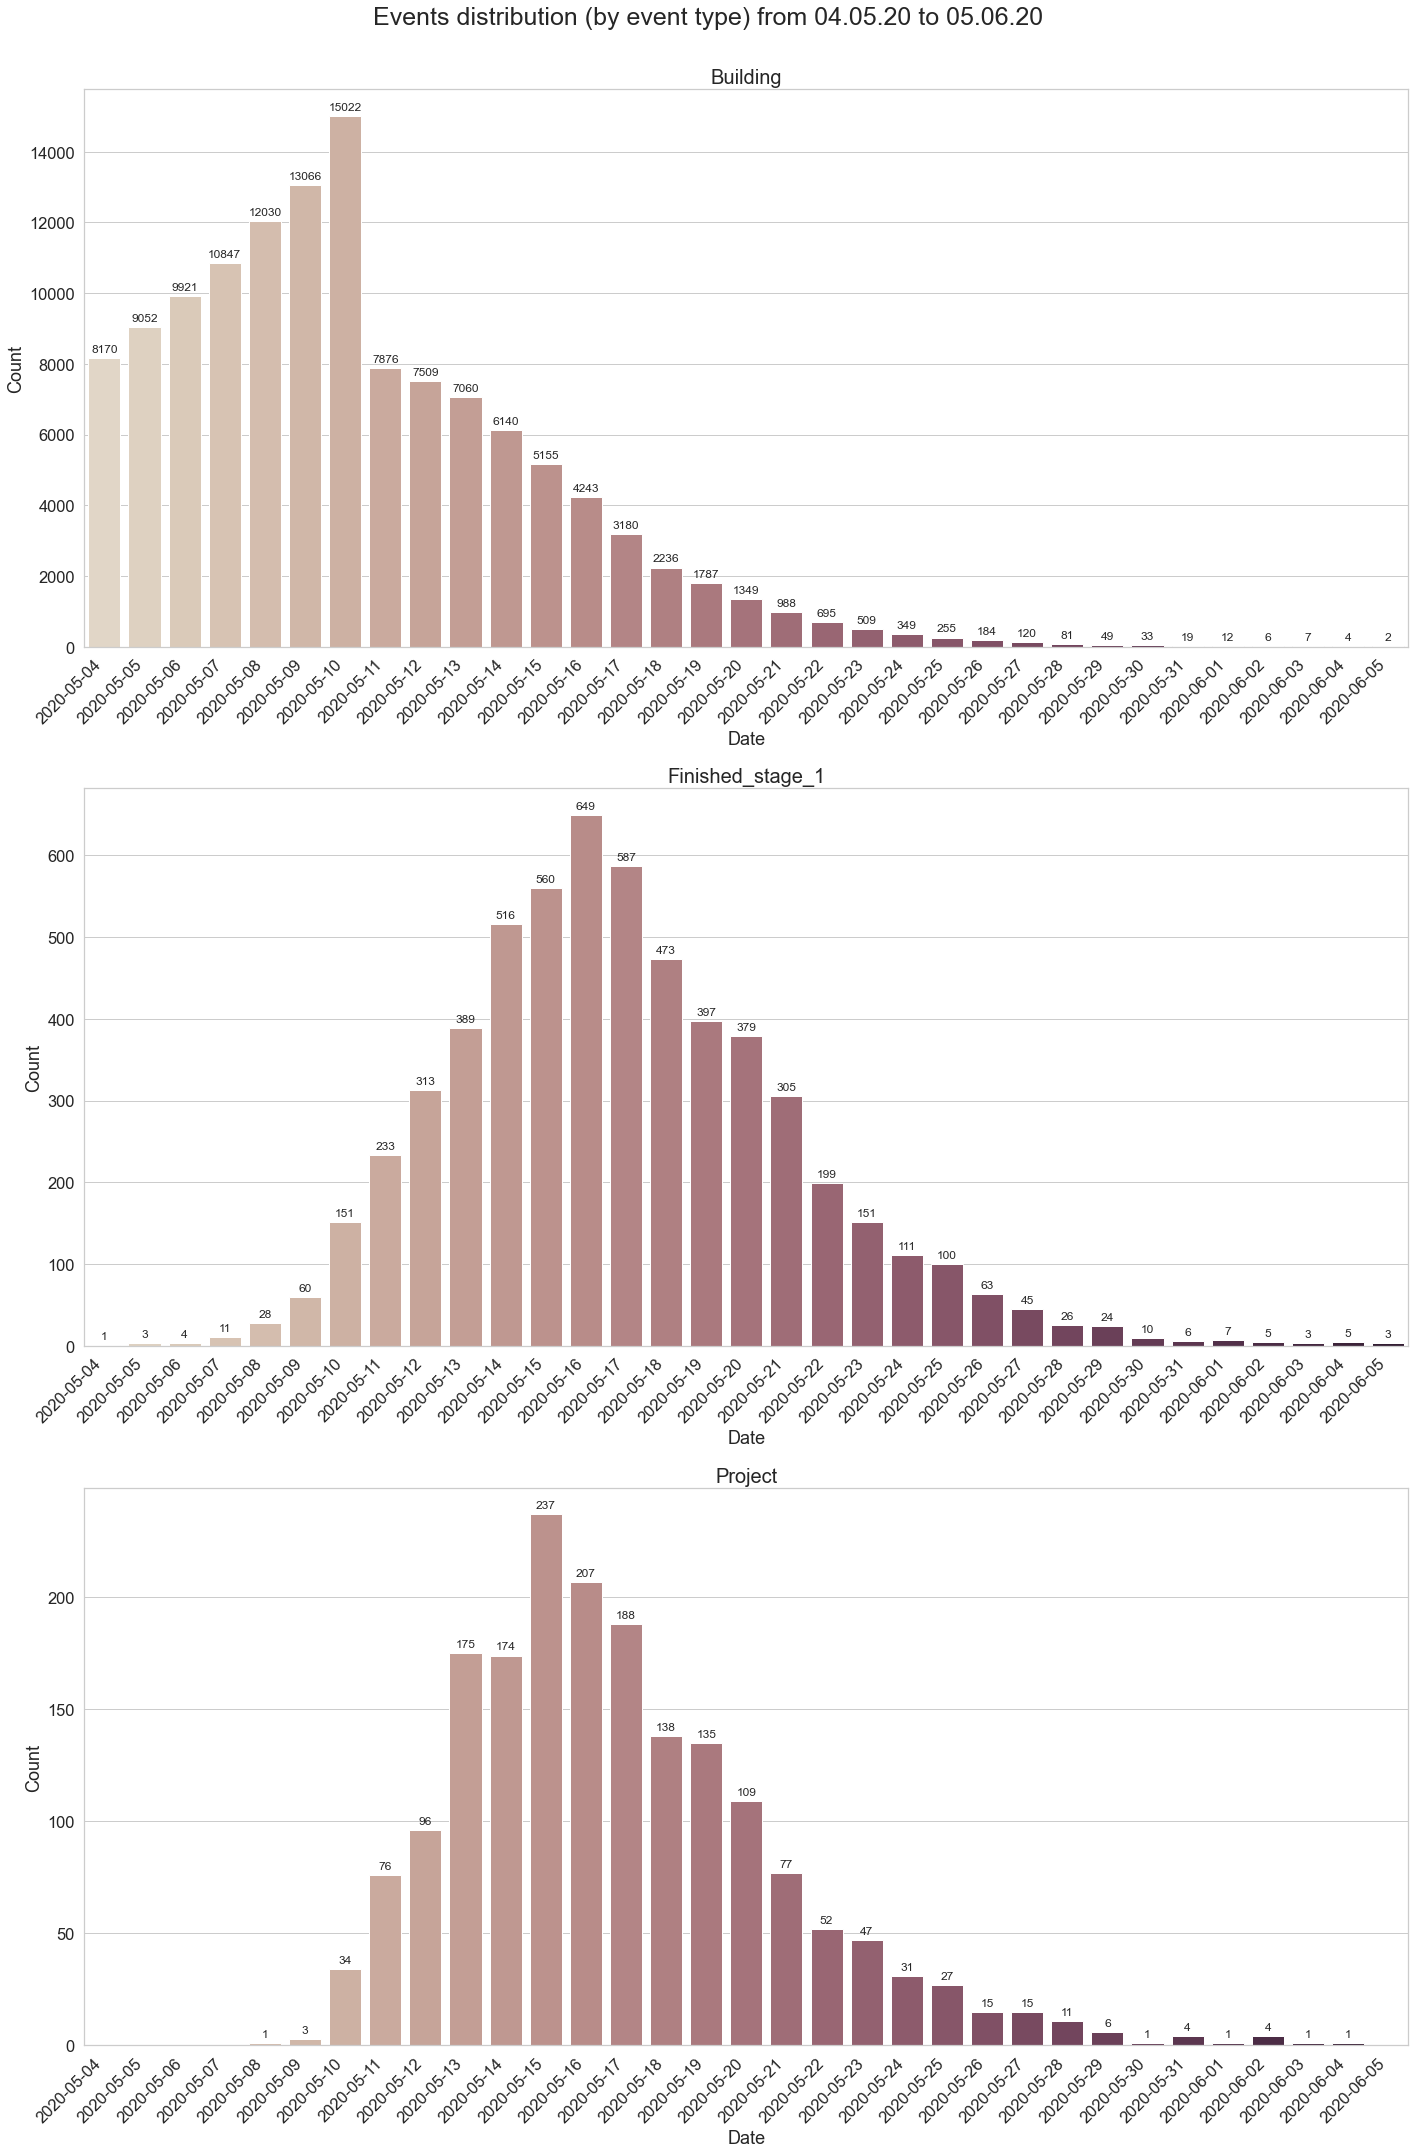

In [24]:
# events distribution (by event type)
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Events distribution (by event type) from 04.05.20 to 05.06.20', 
             fontsize=25, y=1)
for column, ax in zip(events_dynamics.columns, axs.ravel()):
    xticklabels = events_dynamics.index
    plot = sns.barplot(data=events_dynamics, x=events_dynamics.index, y=column,
                palette="ch:.25", ax=ax)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=12)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('Date')
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

*Conclusion: the building barplot replicates the pattern of the total number of events (because it is the dominant event in the game), the first level completion and project implementation barplots are close to the normal distribution. The basic strategy of the game is:  create buildings at the beginning to gain more resources, implement the project and complete the first stage. The number of projects is significantly lower than the number of stage one completion, which indirectly indicates that a high percentage of players chose the PvP strategy. Note that after May 25 and until the end of the analyzed period, the number of events is very small (compared to the previous period).*

In [25]:
# average number of events per user
print('Average number of events per user (all-time): {ev:.2f} events.'
      .format(ev = game_actions.groupby('user_id').agg({'event': 'count'}).mean()[0]))

Average number of events per user (all-time): 9.99 events.


In [26]:
# average number of events per user per day
user_day_events = game_actions.groupby(['event_dt']).agg({'event': 'count', 'user_id':'nunique'})
print('Average number of events per user (per day): {ev:.2f} events.'
      .format(ev=(user_day_events['event']/user_day_events['user_id']).mean()))

Average number of events per user (per day): 1.33 events.


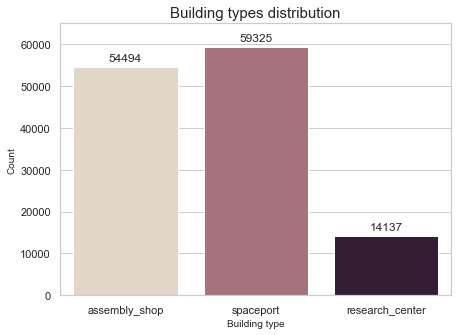

In [27]:
# building types distribution
sns.set(font_scale = 1)
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
plot = sns.countplot(data=game_actions, x='building_type', palette="ch:.25")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=12)
plt.xlabel('Building type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Building types distribution', fontsize=15)
plt.ylim(0, 65000);

*Conclusion: players almost equally often build assembly_shop and spaceport (54494 and 59325 times respectively). Much less often was built the research_center (14138 times). Spaceport is connected with the PvP game strategy, research_center is connected with the project implementation (PvE strategy).*

In [28]:
# number of events of each type in the dynamic (group per date and type of event)
buildings_dynamics = (game_actions.query('event=="building"')
                      .groupby(['event_dt', 'building_type'])
                      .agg({'building_type':'count'}))
buildings_dynamics.columns = ['count']
buildings_dynamics = buildings_dynamics.reset_index().pivot_table('count', 'event_dt', 'building_type')
buildings_dynamics.head(3)

building_type,assembly_shop,research_center,spaceport
event_dt,,,
2020-05-04,7767.0,NaN,403.0
2020-05-05,7816.0,NaN,1236.0
2020-05-06,7736.0,5.0,2180.0


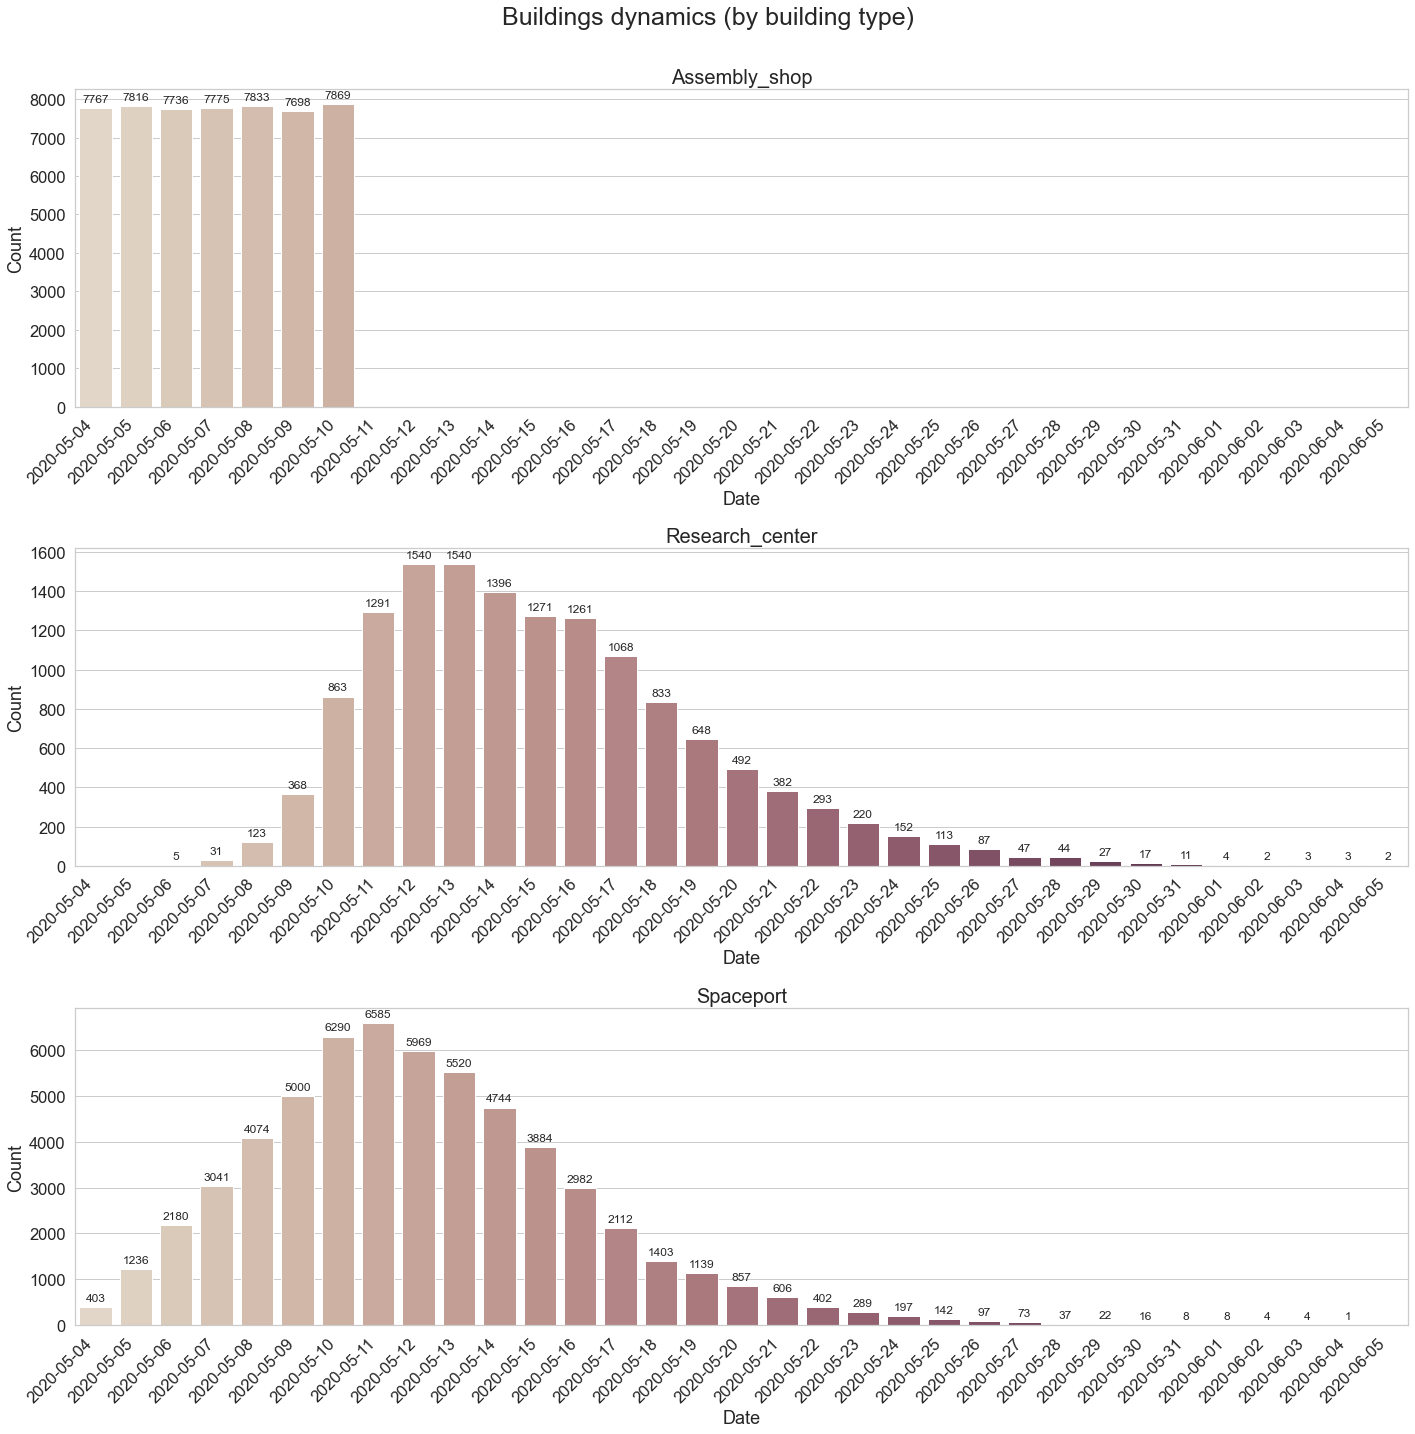

In [29]:
# building types dynamics
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Buildings dynamics (by building type)', fontsize=25, y=1)
for column, ax in zip(buildings_dynamics.columns, axs.ravel()):
    xticklabels = buildings_dynamics.index
    plot = sns.barplot(data=buildings_dynamics, x=buildings_dynamics.index, y=column,
                palette='ch:.25', ax=ax)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=12)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('Date')
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

*Conclusion: assembly_shop build exclusively at the beginning of the game, spaceport and research_center closer to the middle of the game (some players build spaceport from the first days of the game). The quantity distribution for spaceport and research_center is close to normal. Note that after May 25 and until the end of the analyzed period there are practically no building events.*

In [30]:
# average number of buildings per player
print('Average number of buildings per player: {ev:.2f} buildings.'
      .format(ev = game_actions.groupby('user_id').agg({'building_type': 'count'}).mean()[0]))

Average number of buildings per player: 9.43 buildings.


In [31]:
# average number of buildings per player daily
user_day_buildings = game_actions.query('event == "building"').groupby(
    ['event_dt']).agg({'event': 'count', 'user_id':'nunique'})
print('Average number of buildings per player (daily): {ev:.2f} buildings.'
      .format(ev=(user_day_buildings['event']/user_day_buildings['user_id']).mean()))

Average number of buildings per player (daily): 1.23 buildings.


##  User profiles creation

In [32]:
# players who reach the first level
print('First level ratio is: {done:.2f} %.'
      .format(done=len(game_actions.query('event == "finished_stage_1"'))/user_source.shape[0]*100))

First level ratio is: 42.85 %.


In [33]:
# create profiles, add "first stage completion" feature
user_profiles = user_source.merge(
    game_actions.query('event == "finished_stage_1"')[['user_id', 'event']], how='left', on='user_id')
user_profiles.rename(columns={'event': 'first_level'}, inplace=True)
user_profiles['first_level'] = np.where(user_profiles['first_level'] == 'finished_stage_1', 1, 0)
user_profiles.head(3)

,user_id,source,first_level
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0


In [34]:
#strategy distribution (among those who have completed the first level)
print('PvE players ratio (completed the first level): {pve:.2f} %.'
      .format(pve=len(game_actions.query('project_type == project_type'))
              /len(game_actions.query('event == "finished_stage_1"'))*100))
print('PvP players ratio (completed the first level): {pvp:.2f} %.'
      .format(pvp=100-len(game_actions.query('project_type == project_type'))
              /len(game_actions.query('event == "finished_stage_1"'))*100))

PvE players ratio (completed the first level): 32.08 %.
PvP players ratio (completed the first level): 67.92 %.


In [35]:
# add strategy feature (PVE) 
user_profiles = user_profiles.merge(
    game_actions.query('event == "project"')[['user_id', 'event']], how='left', on='user_id')
user_profiles.rename(columns={'event': 'pve'}, inplace=True)
user_profiles['pve'] = np.where(user_profiles['pve'] == 'project', 1, 0)
user_profiles.head(3)

,user_id,source,first_level,pve
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0,0


In [36]:
# add strategy feature (PVP)
user_profiles['pvp'] = np.where(
    (user_profiles['first_level'] == 1) & (user_profiles['pve'] != 1), 1, 0)

In [37]:
# check
print(user_profiles['first_level'].value_counts(normalize=True))
print(user_profiles.query('first_level ==1')['pve'].value_counts(normalize=True))
print(user_profiles.query('first_level ==1')['pvp'].value_counts(normalize=True))

0    0.571523
1    0.428477
Name: first_level, dtype: float64
0    0.679216
1    0.320784
Name: pve, dtype: float64
1    0.679216
0    0.320784
Name: pvp, dtype: float64


*Conclusion: all categories are distributed correctly.*

In [38]:
# calculate the first and last connection date, the completion date for the first level
lvl_completed = game_actions.query('event == "finished_stage_1"')[['user_id', 'event_datetime']]
first_enter = game_actions.groupby('user_id')['event_datetime'].min().reset_index()
last_enter = game_actions.groupby('user_id')['event_datetime'].max().reset_index()
first_enter.columns = ['user_id', 'first_session']
last_enter.columns = ['user_id', 'last_session']
lvl_completed.columns = ['user_id', 'stage1_dt']
display(lvl_completed.head(3))
display(first_enter.head(3))
last_enter.head(3)

,user_id,stage1_dt
6659,ced7b368-818f-48f6-9461-2346de0892c5,2020-05-04 19:47:29
13134,7ef7fc89-2779-46ea-b328-9e5035b83af5,2020-05-05 13:22:09
15274,70db22b3-c2f4-43bc-94ea-51c8d2904a29,2020-05-05 18:54:37


,user_id,first_session
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52


,user_id,last_session
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27


In [39]:
# join session dates to user prfiles
dfs = user_profiles, first_enter, last_enter
user_profiles = ft.reduce(lambda left, right: pd.merge(left, right, on='user_id'), dfs)
user_profiles.head(3)

,user_id,source,first_level,pve,pvp,first_session,last_session
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27


In [40]:
# join lvl completion date
user_profiles = user_profiles.merge(lvl_completed, on='user_id', how='left')
user_profiles.head(3)

,user_id,source,first_level,pve,pvp,first_session,last_session,stage1_dt
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,NaT
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,NaT
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,NaT


In [41]:
# calculation of the time spent in the game, the time to reach the first level
user_profiles['in_game'] = (user_profiles['last_session'] - user_profiles['first_session']).dt.days
user_profiles['days_to_stage1'] = (user_profiles['stage1_dt'] - user_profiles['first_session']).dt.days
user_profiles.head(3)

,user_id,source,first_level,pve,pvp,first_session,last_session,stage1_dt,in_game,days_to_stage1
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,NaT,14,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,NaT,12,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,NaT,8,NaN


## Analysis of the features the have an impact on the first level completion (target event):

In [42]:
# statistics of time spent on the game by categories of users
print(f'\n\033[1;30;47m_____________FIRST LEVEL FAILED:_____________\033[0;0m\n')
display(user_profiles[user_profiles['first_level'] != 1]['in_game'].describe().to_frame().T)
print(f'\n\033[1;30;47m_____________FIRST LEVEL OBTAINED:_____________\033[0;0m\n')
display(user_profiles[user_profiles['first_level'] == 1]['in_game'].describe().to_frame().T)
print(f'\n\033[1;30;47m_____________PVE:_____________\033[0;0m\n')
display(user_profiles[user_profiles['pve'] == 1]['in_game'].describe().to_frame().T)
print(f'\n\033[1;30;47m_____________PVP:_____________\033[0;0m\n')
display(user_profiles[user_profiles['pvp'] == 1]['in_game'].describe().to_frame().T)


_____________FIRST LEVEL FAILED:_____________



,count,mean,std,min,25%,50%,75%,max
in_game,7759.0,9.285475,4.3457,0.0,6.0,9.0,12.0,29.0



_____________FIRST LEVEL OBTAINED:_____________



,count,mean,std,min,25%,50%,75%,max
in_game,5817.0,11.362214,4.080387,0.0,9.0,11.0,14.0,30.0



_____________PVE:_____________



,count,mean,std,min,25%,50%,75%,max
in_game,1866.0,12.963023,3.526723,5.0,10.0,13.0,15.0,29.0



_____________PVP:_____________



,count,mean,std,min,25%,50%,75%,max
in_game,3951.0,10.606176,4.106099,0.0,8.0,10.0,13.0,30.0


*Conclusion: the players who completed the first level spent on average two additional days in the game (9 versus 11 days). The highest average have PVE players (13 days). Intermediate average have PVP players (10 days). It may be assumed that the PVP strategy is lighter and less time consuming for the user.*

In [43]:
# first level completion statistics
user_profiles['days_to_stage1'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
days_to_stage1,5817.0,11.362214,4.080387,0.0,9.0,11.0,14.0,30.0


*Conclusion: the target event was realized by 5817 players, duration - the day of the beginning of the game, maximum - 30 days, the average is 11 days.*

In [44]:
# building statistics for different categories of players
columns_test = ['first_level', 'pve', 'pvp']
for column in columns_test:
    print(f'\n\033[1;30;47m_____________GROUP {column.upper()}:_____________\033[0;0m\n')
    display(game_actions[['user_id', 'building_type']]
     .merge(user_profiles[user_profiles[column] == 1]['user_id'], on='user_id', how='inner')
     .groupby('user_id')
     .agg({'building_type':'count'})
     .describe()
     .T)


_____________GROUP FIRST_LEVEL:_____________



,count,mean,std,min,25%,50%,75%,max
building_type,5817.0,10.449716,3.184264,2.0,9.0,11.0,12.0,20.0



_____________GROUP PVE:_____________



,count,mean,std,min,25%,50%,75%,max
building_type,1866.0,12.64791,2.162522,10.0,11.0,12.0,14.0,20.0



_____________GROUP PVP:_____________



,count,mean,std,min,25%,50%,75%,max
building_type,3951.0,9.411541,3.059529,2.0,8.0,10.0,12.0,19.0


*Conclusions: the building strategy is PVE strategy, respectively, the average buildings number for players in this strategy is higher - 12 buildings per player versus 10 for PVP players. Generally, users who have completed the first stage have built 11 buildings per player.*

In [45]:
# building stats for players who fail the first level
print(f'\n\033[1;30;47m_____________BUILDINGS FOR PLAYERS THAT HAVEN\'T COMPLETED THE FIRST STAGE:_____________\033[0;0m\n')
(game_actions[['user_id', 'building_type']]
 .merge(user_profiles[user_profiles['first_level'] != 1]['user_id'], on='user_id', how='inner')
 .groupby('user_id')
 .agg({'building_type':'count'})
 .describe()
 .T)


_____________BUILDINGS FOR PLAYERS THAT HAVEN'T COMPLETED THE FIRST STAGE:_____________



,count,mean,std,min,25%,50%,75%,max
building_type,7759.0,8.657043,4.13566,1.0,5.0,8.0,12.0,20.0


*Conclusions: players who have not completed the first level build not so often - 8 buildings per player.*

## Cohort analysis. Retention rate.
In this section we use a custom function to calculate the retention rate.
- for an activity we take any event from the `game_actions` table;
- date of analysis 10 June 2020;
- horizon is 14 days;

In [46]:
def get_retention(user_profiles, game_actions, observation_date, horizon_days, 
                  dimensions=[], ignore_horizon=False):
    '''The function accepts user profiles, user activity, date and horizon of analysis as well as 
    an additional grouping parameter. It returns raw data and the retention table.'''
    # select first and last session for each user
    user_profiles['dt'] = pd.to_datetime(user_profiles['first_session']).dt.date
    # exclude users that not get to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = user_profiles.query('dt <= @last_suitable_acquisition_date')
    # join sessions data to user profiles by user_id column
    result_raw = user_profiles.merge(
        game_actions[['user_id', 'event_datetime']], on='user_id', how='left')
    # calculate a lifetime for each session (in days)
    result_raw['lifetime'] = (result_raw['event_datetime'] - result_raw['first_session']).dt.days
    # create retention table
    result_grouped = result_raw.pivot_table(
        index=dimensions, 
        columns='lifetime', 
        values='user_id', 
        aggfunc='nunique')
    # calculate cohort sizes
    cohort_sizes = (result_raw
                    .groupby(dimensions)
                    .agg({'user_id': 'nunique'})
                    .rename(columns={'user_id': 'cohort_size'}))
    # join cohort sizes to the retention table
    result_grouped = cohort_sizes.merge(result_grouped, on=dimensions, how='left').fillna(0)
    # divide retention data by cohort size
    result_grouped = result_grouped.div(
        result_grouped['cohort_size'], axis=0)
    # exclude all lifetime beyond the horizon
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]
    # recreate cohort size column
    result_grouped['cohort_size'] = cohort_sizes
    # return raw and retention data
    return result_raw, result_grouped

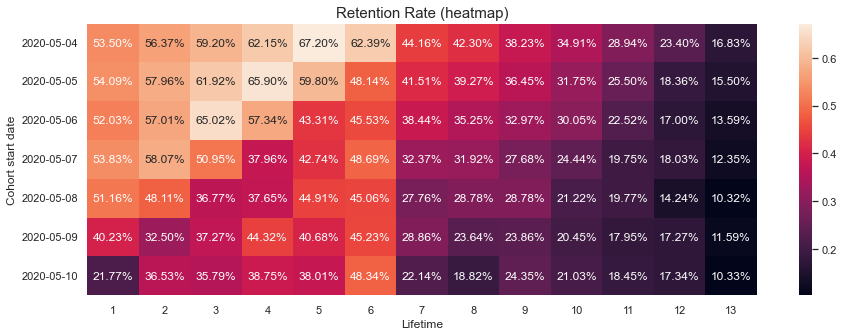

In [47]:
# heatmp with a horizon of analysis
sns.set(font_scale = 1)
retention_raw, retention = get_retention(user_profiles, game_actions, datetime(2020, 6, 10).date(), 14,
                                        dimensions=['dt'])
plt.figure(figsize = (15, 5))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]), annot = True, fmt = '.2%')
plt.title('Retention Rate (heatmap)', fontsize=15)
plt.ylabel('Cohort start date')
plt.xlabel('Lifetime')
plt.show()

*Conclusions: we observe good retention rate of up to 6 lifetime, which drops then sharply by 7th day (possibly influenced by the end of the ad campaign). First-day retention decreases for cohorts towards the end of the ad campaign (May 9 and 10), the last cohort has more than half dropped retention, 21% versus 53%. However, the values for this cohort became better then. The retention at the end of the horizon is about 10%.*

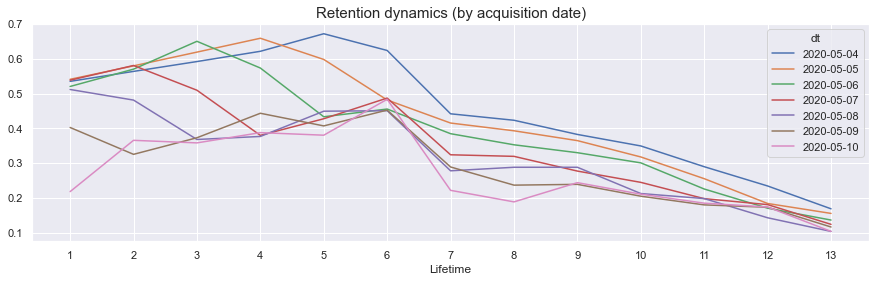

In [48]:
# retention curves
report = retention.drop(columns = ['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 4))
plt.xlabel('Lifetime') 
plt.title('Retention dynamics (by acquisition date)', fontsize=15);

*Conclusions: the retention curves echo the heatmap, the highest retention rate is for the 4th and 5th cohorts, and the worst result shows the 10th cohort. By the end of the period, all cohorts have similar results.*

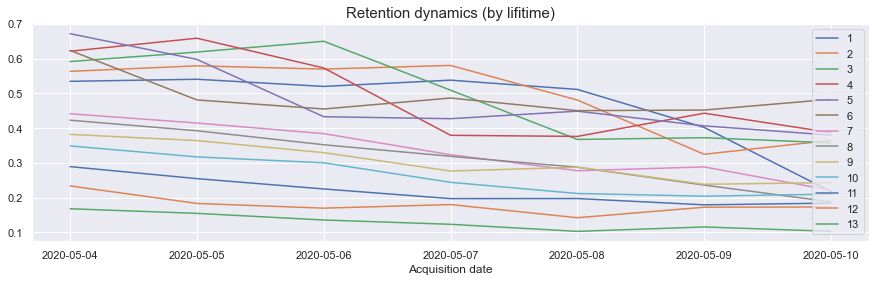

In [49]:
# dynamics charts
report = retention.drop(columns=['cohort_size', 0])
report.plot(grid=True, figsize=(15, 4))
plt.xlabel('Acquisition date')
plt.title('Retention dynamics (by lifitime)', fontsize=15);

*Conclusions: it is clear that the 3rd - 5th day retention fell for the cohort attracted after May 5 (and after May 6 for 3rd day retention).*

Add a smoothing function for the following graphs:

In [50]:
def filter_data(df, window):
    '''The function accepts the input date (retention table) and calculates for each column 
    moving average for the period equal to the window width (window parameter). It returns corrected
    data.'''
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

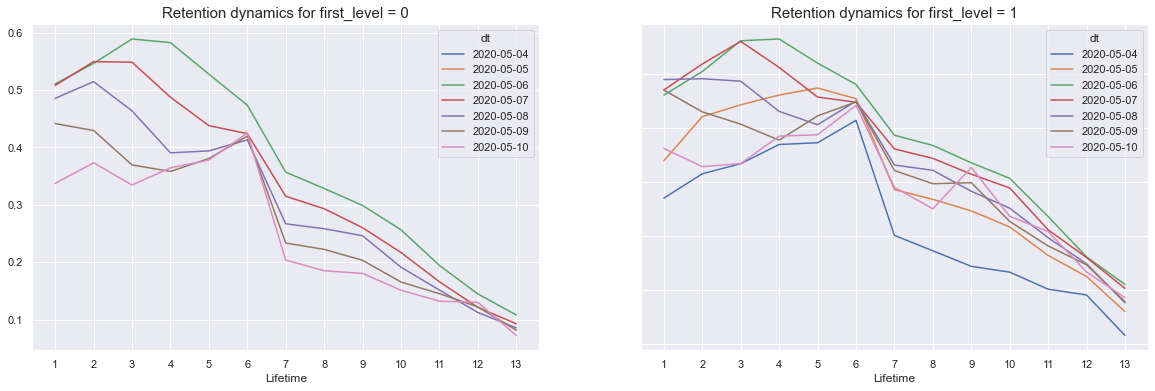

In [51]:
# retention curves by first stage completion and date
retention_raw, retention = get_retention(user_profiles, game_actions, datetime(2020, 6, 10).date(), 
                                                14, dimensions=['first_level', 'dt'])
plt.figure(figsize=(20, 6))
report = retention.drop(columns=['cohort_size', 0])
# specify the window size and apply the smoothing function
window = 3
report = filter_data(report, window)
for i, first_level in enumerate(user_profiles['first_level'].unique()):
    report.query('first_level == @first_level').droplevel('first_level').T.plot(
        grid=True,
        sharey=True,
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1))
    plt.xlabel('Lifetime')
    plt.title('Retention dynamics for first_level = {}'.format(first_level), fontsize=15)
plt.show()

*Conclusions: the retention of users who have committed the target action is somewhat higher, but for the 6 May cohort we observe an opposite pattern. After day 6, the retention rate decreases more quickly for first-level users, particularly for the May 4 cohort.*

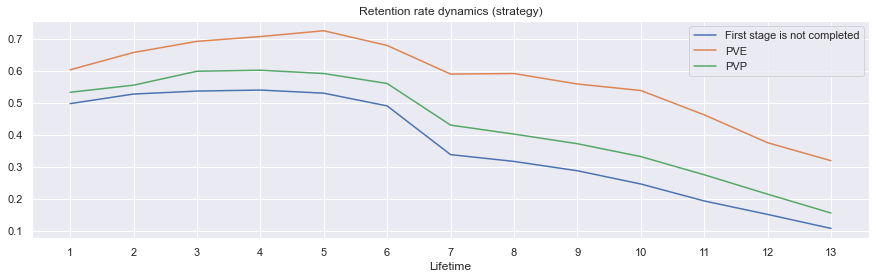

In [52]:
# retention by strategy
retention_raw, retention = get_retention(user_profiles, game_actions, datetime(2020, 6, 10).date(), 
                                                14, dimensions=['pvp', 'pve'])
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 4))
plt.xlabel('Lifetime')
plt.legend(['First stage is not completed', 'PVE', 'PVP'])
plt.title('Retention rate dynamics (strategy)')
plt.show()

*Conclusions: retention rate for first level users is higher. Retention rate for PVE players is higher than for PVP players.*

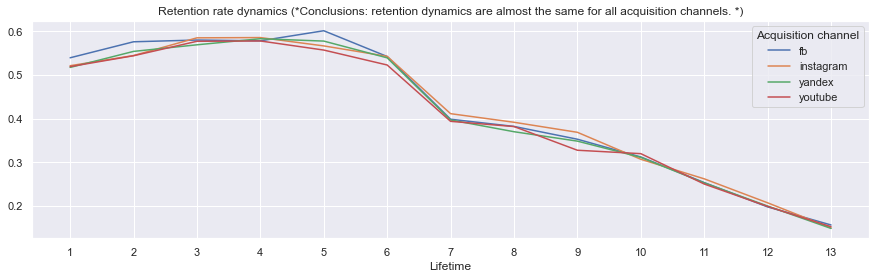

In [53]:
# retention by source
retention_raw, retention = get_retention(user_profiles, game_actions, datetime(2020, 6, 10).date(), 
                                                14, dimensions=['source'])
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 4))
plt.xlabel('Lifetime')
plt.legend(title='Acquisition channel')
plt.title('Retention rate dynamics (*Conclusions: retention dynamics are almost the same for all acquisition channels. *)')
plt.show()

*Conclusions: retention dynamics are almost the same for all acquisition channels.*

## Interim conclusions

*Game platform analysis:* 
- the number of users increased during the ad campaign and then gratually decreased. At the end of the period analyzed, nearly all affected users are inactive;
- the maximum number of unique users is observed on the last day of the advertising campaign (10.05.2020) - 9219 unique users, the minimum on the last day of the analyzed period (05.06.2020) - 4 unique users;
- average number of unique users per day - 2884;
- the curve of game events repeats the pattern of the unique users' dynamics: growth during the advertising campaign and a smooth decline after its end;
- the maximum is observed on the last day of the advertising campaign (10.05.2020) - 15208 events, the minimum on the last day of the analyzed period (05.06.2020) - 5 events;
- average number of events per day - 4110 events;
- the most popular event in the game - building (127957 times), the first level completion - 5817 times, project implementation - 1866 times;
- the basic strategy of the game is: create buildings at the beginning to gain more resources, implement the project and complete the first stage;
- the number of projects is significantly lower than the number of stage one completion, which indirectly indicates that a high percentage of players chose the PvP strategy;
- average number of events per user (all-time): 9.99 events, 1.33 daily;
- players almost equally often build assembly_shop and spaceport (54494 and 59325 times respectively). Much less often was built the research_center (14138 times);
- assembly_shop was build exclusively at the beginning of the game, spaceport and research_center closer to the middle of the game (some players build spaceport from the first days of the game);
- average number of buildings per player: 9.43 buildings, 1.23 daily;
- first level ratio is (players that have completed the first stage): 42.85 %;
- PvE players ratio is 32.08 %;
- PvP players ratio is 67.92 %;

*Analysis of the features the have an impact on the first level completion (target event):*
- the players who completed the first level spent on average two additional days in the game (9 versus 11 days). The highest average have PVE players (13 days). Intermediate average have PVP players (10 days);
- the target event was realized by 5817 players, duration - the day of the beginning of the game, maximum - 30 days, the average is 11 days;
- PVE players build more often - 12 buildings per player versus 10 for PVP players. players who have not completed the first level build less - 8 buildings per player;

*Cohort analysis:*
- we observed good retention rate of up to 6 lifetime, which drops then sharply by 7th day;
- first-day retention decreases for cohorts towards the end of the ad campaign (May 9 and 10), the last cohort has more than half dropped retention, 21% versus 53%;
- the retention at the end of the horizon is about 10%;
- the retention curves echo the heatmap, the highest retention rate is for the 4th and 5th cohorts, and the worst result shows the 10th cohort. By the end of the period, all cohorts have similar results;
- the 3rd - 5th day retention fell for the cohort attracted after May 5 (and after May 6 for 3rd day retention);
- the retention of users who have committed the target action is somewhat higher, but for the 6 May cohort we observed an opposite pattern. After day 6, the retention rate decreases more quickly for first-level users, particularly for the May 4 cohort;
- retention rate for first level users is higher than for those who haven't;
- retention rate for PVE players is higher than for PVP players;
- retention dynamics are almost the same for all acquisition channels.

# Advertisement campaign

In [54]:
# ad campaign duration
print('Ad campaign start date:', ad_costs['day'].min())
print('Ad campaign end date:', ad_costs['day'].max())

Ad campaign start date: 2020-05-04 00:00:00
Ad campaign end date: 2020-05-10 00:00:00


In [55]:
# total costs
display(ad_costs['cost'].describe().to_frame().T)
print('Total spent on ad campaign {s:.2f} USD.'.format(s=ad_costs['cost'].sum()))

,count,mean,std,min,25%,50%,75%,max
cost,28.0,271.556321,286.86765,23.314669,66.747365,160.056443,349.034473,969.139394


Total spent on ad campaign 7603.58 USD.


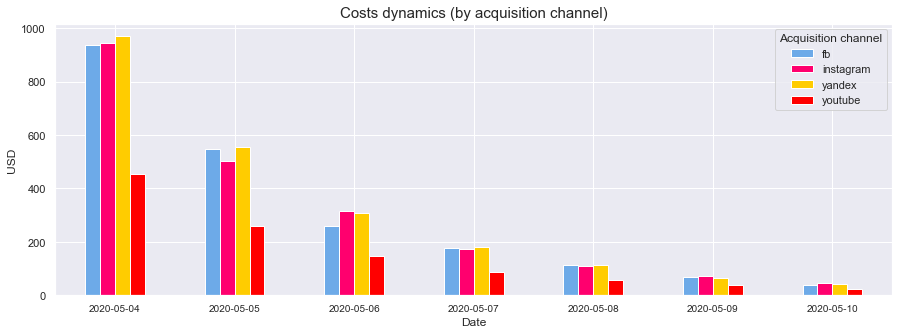

In [56]:
# costs by acquisition channel
color = ['#6daae8', '#ff006e', '#ffcc00', '#ff0000']
ad_costs.pivot_table(
    index='dt', 
    columns='source', 
    values='cost').plot(kind='bar', figsize=(15, 5),color=color)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USD', fontsize=12)
plt.xticks(fontsize=10, rotation=360)
plt.legend(title='Acquisition channel')
plt.title('Costs dynamics (by acquisition channel)', fontsize=15);

*Conclusions: most of the funds were spent on the first day of the ad campaign, then the costs became lower. At the start of the campaign, costs for the Yandex channel were slightly higher, but then matched those of the Facebook and Instagram channels. The costs for the YouTube channel were the lowest and is roughly half the cost of other channels.*

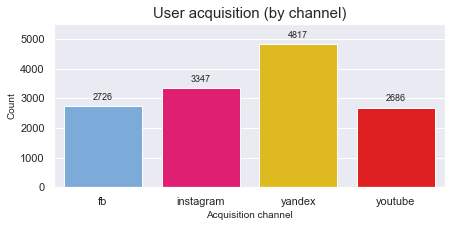

In [57]:
# users by acquisition channel (entire period)
user_by_source = user_source.groupby('source')['user_id'].count().reset_index()
plt.figure(figsize=(7, 3))
plot = sns.barplot(data=user_by_source, x='source', y='user_id', palette=color)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=9)
plt.xlabel('Acquisition channel', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('User acquisition (by channel)', fontsize=15)
plt.ylim(0, 5500);

*Conclusions: most of the users came from Yandex - 4817 users, then goes Instagram - 3347 users. The other channels attracted from 2600 to 2800 users.*

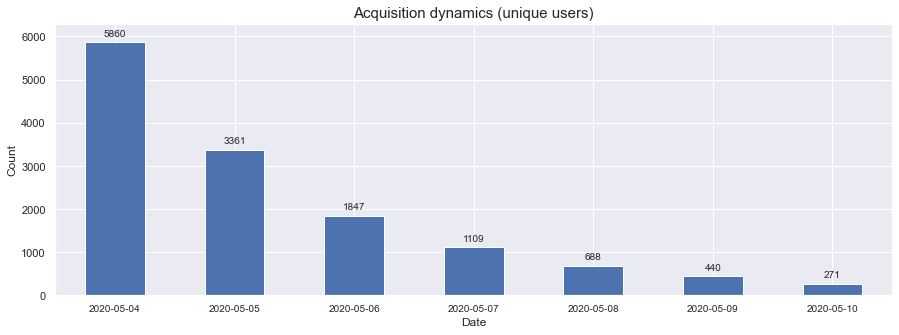

In [58]:
# unique users daily
unique_daily = user_profiles.pivot_table(index='dt', values='user_id', aggfunc='count')
ax = unique_daily.plot(kind='bar',figsize=(15, 5), legend=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylim(0, 6300)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10, rotation=360)
plt.title('Acquisition dynamics (unique users)', fontsize=15);

*Conclusions: according to the cost trends, the number of attracted users on the first day of the campaign was the largest - 5860 users, minimum observed on the last day of the campaign  - 271 users.*

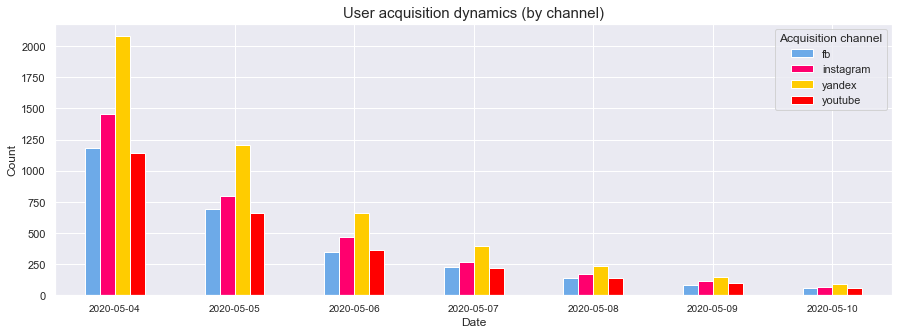

In [59]:
# daily increase in users by acquisition channel
user_profiles.pivot_table(
    index='dt', 
    columns='source', 
    values='user_id', 
    aggfunc='count').plot(kind='bar', figsize=(15, 5),color=color)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10, rotation=360)
plt.legend(title='Acquisition channel')
plt.title('User acquisition dynamics (by channel)', fontsize=15);

*Conclusions: Yandex is the leader in the number of attracted users throughout the advertising campaign. The other channels attracted roughly equal numbers of users.*

## СAC calculation

In [60]:
# count the number of unique users with the same source and acquisition date
dt_source_u = (user_profiles
               .groupby(['dt', 'source'])
               .agg({'user_id': 'nunique'})
               .rename(columns={'user_id': 'unique_users'})
               .reset_index())
# combine advertising costs and the number of attracted users by date and source
ad_costs = ad_costs.merge(dt_source_u, on=['dt', 'source'], how='left')
# divide advertising costs by number of attracted users (CAC)
ad_costs['acquisition_cost'] = ad_costs['cost'] / ad_costs['unique_users']
# add acquisition cost to profiles
user_profiles = user_profiles.merge(
    ad_costs[['dt', 'acquisition_cost', 'source']], 
    on=['dt', 'source'], 
    how='left')
user_profiles.head(3)

,user_id,source,first_level,pve,pvp,first_session,last_session,stage1_dt,in_game,days_to_stage1,dt,acquisition_cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,fb,0,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,NaT,14,NaN,2020-05-06,0.754162
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex,0,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,NaT,12,NaN,2020-05-06,0.464206
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube,0,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,NaT,8,NaN,2020-05-05,0.390759


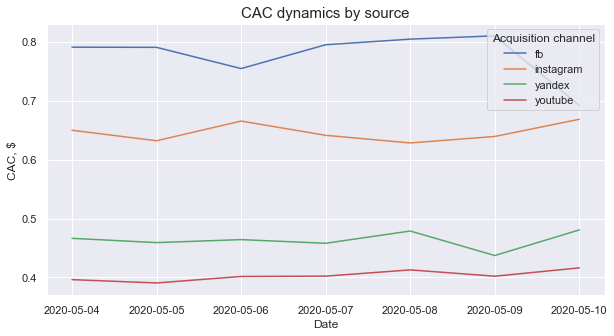

In [61]:
# CAC dynamics by source
user_profiles.pivot_table(
    index='dt', columns='source', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Date')
plt.legend(title='Acquisition channel', loc=1)
plt.title('CAC dynamics by source', fontsize=15)
plt.show()

*Conclusions: the most expensive users come from the advertising network of Facebook, then goes Instagram. Attracting users of Yandex and Youtube channels is much less costly. The average CAC for all channels in the dynamics is quite stable, changes are observed at the end of the advertising campaign: the acquisition cost for the Facebook channel decreased from 0.8 to 0.7. for the rest of the channels increased slightly.*

In [62]:
# CAC average by source
user_profiles.groupby('source').agg({'acquisition_cost':'mean'})

,acquisition_cost
source,
fb,0.785365
instagram,0.645785
yandex,0.463590
youtube,0.397662


*Conclusions: attracting one user from the advertising network of Facebook cost the company on average 78 cents, and from Youtube about 40 cents.*

## Development of monetization strategy and payback estimation.

According to the information of the customer, the income from showing an advertisement is 7 cents. In this section, we will assess the basic monetization strategy - display ads on all construction events to recover costs. We will calculate LTV and ROMI as well.       
Spent on advertising during the campaign: 7603.58 USD.
According to the results of EDA, the advertising option before choosing a construction is optimal, like:
- construction is the most common event in the game;
- this event is present throughout the user’s interaction with the game, as opposed to the completion of the level (reached 42% of users) or the implementation of the project (absent for PVP players);
- to give preference to displaying advertising on a certain type of construction is inappropriate, as assembly_shop is built only at the beginning of the game, and the distribution of other types is not uniform throughout the gameplay (division into PVP and PVE categories, which are characterized by different types of buildings);
- advertising is better to show from the first construction due to a rapid decline in involvement in the game (after the end of the ad campaign, the number of buildings is quickly reduced);

In [63]:
# calculation of total revenue from advertising 
print('Revenue from advertising: {s:.0f} USD.'.format(s=len(game_actions.query('event == "building"'))*0.07))

Revenue from advertising: 8957 USD.


## Alternative monetization strategy

Calculate the revenue from advertising according to the alternative strategy of monetization (in order to reduce the advertising load on users): display of advertising from the 3rd building for each user.

In [64]:
# remain only building events
buildings = game_actions.query('event == "building"')
# buildings count (group by user, count the total number)
b_count = (buildings
           .groupby('user_id')
           .agg({'user_id':'count'})
           .rename(columns={'user_id':'b_count'})
           .reset_index())
b_count.head()

,user_id,b_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8
4,002f508f-67b6-479f-814b-b05f00d4e995,12


In [65]:
# reduce the number of constructions for each player by 2
b_count['b_count'] = b_count['b_count']-2
b_count.head()

,user_id,b_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,11
1,00151b4f-ba38-44a8-a650-d7cf130a0105,7
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2
3,001d39dc-366c-4021-9604-6a3b9ff01e25,6
4,002f508f-67b6-479f-814b-b05f00d4e995,10


In [66]:
# filter negative values
b_count = b_count.query('b_count > 0')

In [67]:
# calculation of total revenue from advertising 
# (one ad income is 0.07 dollars, total count - number of buildings without the first two for each player) 
print('Revenue from advertising: {} USD'.format(b_count['b_count'].sum() * 0.07))

Revenue from advertising: 7060.27 USD


*Conclusion: alternative monetization strategy does not pay off (7,603 USD was spent).*

Also the following strategies were tested: show ads only on assembly_shop, show ads on spaceport and reserach_center - they also do not pay off. To reduce the advertising load on the user, only the display from the second construction is cost-effective:

In [68]:
# remain only building events
buildings = game_actions.query('event == "building"')
# buildings count (group by user, count the total number)
b_count = (buildings
           .groupby('user_id')
           .agg({'user_id':'count'})
           .rename(columns={'user_id':'b_count'})
           .reset_index())
# reduce the number of constructions for each player by 1
b_count['b_count'] = b_count['b_count']-1
# filter negative values
b_count = b_count.query('b_count > 0')
# calculation of total revenue from advertising 
print('Revenue from advertising: {} USD'.format(b_count['b_count'].sum() * 0.07))

Revenue from advertising: 8006.6 USD


*Conclusions: in this case, the revenue will be 105%, which does not take into account the possible decrease in building events due to advertising. Therefore, this strategy should not be considered optimal for business.*

The advertising load under the standard strategy will be: the average number of constructions per player (per day) - 1.23 buildings, which might not lead to a significant user outflow. In this case, the profitability is 117%, which might not be less than amount of money spent, considering the possible exits.

## LTV calculation

In [69]:
def get_ltv(profiles, revenue, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    '''The function takes user profiles and revenue dataframes as an input, as well as the moment of the anaysis,
    its horizon and parameter to partition the LTV into the specified category (dimensions). 
    The function returns three tables: raw, grouped data and LTV dynamics tables.'''
    # exclude users that not get to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        # add purchase time and revenue to user profiles
        revenue[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )
    # calculate the user’s lifetime for each purchase (income lifetime)
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days
    # group per cohort, if there are no dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # function to group a table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        # build a pivot table
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # in the cells - revenue for each lifetime
            aggfunc='sum',
        )
    # count the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
    # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
     # join cohort size with revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
    # calculate LTV
        # divide each «cell» in a row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifitimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes
        return result
    # get the LTV table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # for LTV dynamics exclude 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # get the LTV table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # return both LTV tables and raw data
    return result_raw, result_grouped, result_in_time

In [70]:
# create income table: filter building events, select user ID and date
revenue = game_actions.query('event == "building"')[['user_id', 'event_dt']]
# revenue from advertising - 7 cents
revenue['revenue'] = 0.07
revenue.head(2)

,user_id,event_dt,revenue
0,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,0.07
1,c07b1c10-f477-44dc-81dc-ec82254b1347,2020-05-04,0.07


The moment and horizon of analysis remain the same: 10.06.2020, 14 days.

In [71]:
# apply ltv function
ltv_raw, ltv, ltv_history = get_ltv(user_profiles, revenue, datetime(2020, 6, 10).date(), 14, 
                                    dimensions=[], ignore_horizon=False)

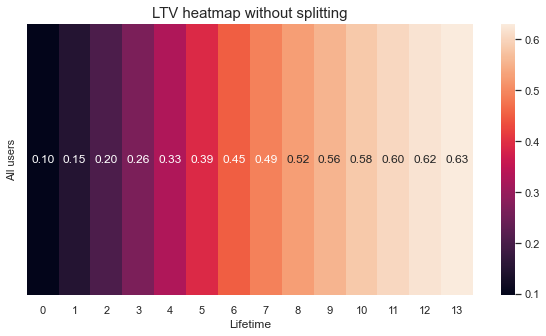

In [72]:
# create a LTV heatmap without splitting
plt.figure(figsize=(10, 5))
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('LTV heatmap without splitting', fontsize=15)
plt.xlabel('Lifetime')
plt.ylabel('')
plt.show()

*Conclusions: the revenue from the advertising is recorded in dollars - weekly LTV at the start of May was 49 cents, at the end of the second week 63 cents.*

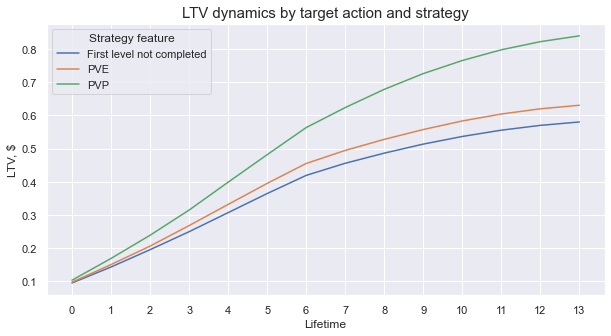

In [73]:
# LTV curves by strategy
ltv_raw, ltv, ltv_history = get_ltv(user_profiles, revenue, datetime(2020, 6, 10).date(), 14,
                                    dimensions=['pve', 'pvp'], ignore_horizon=False)
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV dynamics by target action and strategy', fontsize=15)
plt.ylabel('LTV, $')
plt.xlabel('Lifetime')
plt.legend(title='Strategy feature', labels=['First level not completed', 'PVE', 'PVP'])
plt.show()

*Conclusions: LTV is higher for users who have done the target action. The LTV for PVE users is slightly higher, but PVP users are slightly behind.*

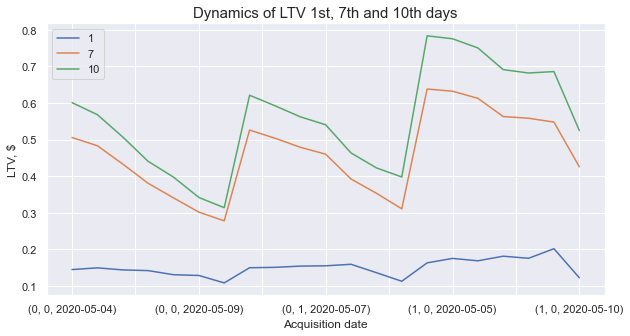

In [74]:
# LTV dynamics
report = ltv_history[[1, 7, 10]]  # data slice
report.plot(grid=True, figsize=(10, 5))
plt.title('Dynamics of LTV 1st, 7th and 10th days', fontsize=15)
plt.ylabel('LTV, $')
plt.xlabel('Acquisition date')
plt.show()

*Conclusions: LTV of the first day (bottom line), changes little, while LTV of the 7th and 10th day (middle and upper lines), fluctuate and grow slightly.*

## ROI calculation

To calculate the ROI for each acquisition channel, first we will find the «lifetime value» of users by the channel.

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
source,,,,,,,,,,,,,,,
fb,2726,0.097245,0.149475,0.208665,0.269215,0.332693,0.396966,0.458903,0.499116,0.534578,0.565033,0.591559,0.613155,0.629178,0.640862
instagram,3347,0.096979,0.149244,0.203307,0.262411,0.327266,0.389800,0.450388,0.491401,0.527437,0.559122,0.585202,0.607810,0.624625,0.635814
yandex,4817,0.096913,0.149228,0.204580,0.263521,0.325354,0.388132,0.447393,0.488314,0.521447,0.551935,0.578455,0.598989,0.615032,0.626222
youtube,2686,0.096817,0.147897,0.202130,0.261523,0.323574,0.384870,0.443429,0.483459,0.518485,0.548742,0.573682,0.594844,0.610741,0.622468


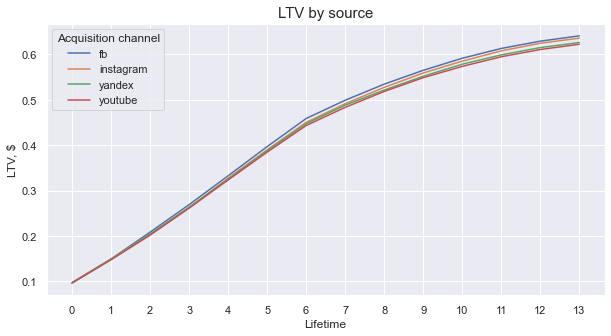

In [75]:
# find LTV by acquisition channel
ltv_raw, ltv, ltv_history = get_ltv(user_profiles, revenue, datetime(2020, 6, 10).date(), 14, 
                                    dimensions=['source'])
# LTV table
display(ltv)
# LTV curves
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV by source', fontsize=15)
plt.ylabel('LTV, $')
plt.xlabel('Lifetime')
plt.legend(title='Acquisition channel')
plt.show()

*Conclusion: LTV curve is similar for all sources.*

In [76]:
# find the maximum acquisition date from raw LTV data
max_acquitision_dt = ltv_raw['dt'].max()
# cut out profiles that are «older» of this date
ltv_profiles = user_profiles.query('dt <= @max_acquitision_dt')
# remaining users for each lifetime
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})
# average CAC by source
cac = (ltv_profiles
       .groupby('source')
       .agg({'acquisition_cost': 'mean'})
       .rename(columns={'acquisition_cost': 'cac'}))
roi = ltv.div(cac['cac'], axis=0)
# restore the cohort size column after CAC calculation
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
display(roi)

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
source,,,,,,,,,,,,,,,
fb,2726,0.123821,0.190326,0.265691,0.342790,0.423615,0.505455,0.584318,0.635521,0.680675,0.719453,0.753228,0.780726,0.801129,0.816006
instagram,3347,0.150173,0.231105,0.314822,0.406345,0.506773,0.603606,0.697428,0.760937,0.816737,0.865802,0.906187,0.941196,0.967234,0.984560
yandex,4817,0.209049,0.321896,0.441295,0.568436,0.701815,0.837231,0.965062,1.053333,1.124803,1.190568,1.247775,1.292067,1.326674,1.350810
youtube,2686,0.243465,0.371915,0.508295,0.657651,0.813692,0.967832,1.115091,1.215754,1.303834,1.379921,1.442639,1.495854,1.535830,1.565322


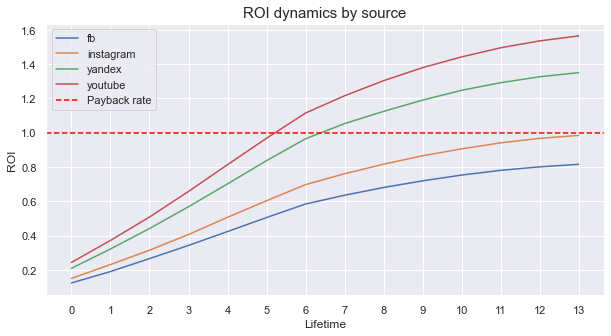

In [77]:
# ROI by source
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI dynamics by source', fontsize=15)
plt.ylabel('ROI')
plt.xlabel('Lifetime')
plt.axhline(y=1, color='red', linestyle='--', label='Payback rate')
plt.legend()
plt.show()

*Conclusions: according to the chart, advertising in Yandex and Youtube paid off to 5th and 6th lifetime, and by the end of the analyzed period paid off 160%, advertising in Instagram almost paid off by the end of the analyzed period, but advertising in Facebook did not pay off at all.*

## Interim conclusions
- advertising campaign lasted from 2020-05-04 to 2020-05-10;
- total spent 7603.58 USD.
- at the start of the campaign, costs for the Yandex channel were slightly higher, but then matched those of the Facebook and Instagram channels;
- the costs for the YouTube channel were the lowest and is roughly half the cost of other channels;
- most of the users came from Yandex - 4817 users, then goes Instagram - 3347 users;
- according to the cost trends, the number of attracted users on the first day of the campaign was the largest - 5860 users, minimum observed on the last day of the campaign - 271 users;
- Yandex is the leader in the number of attracted users throughout the advertising campaign;
- the most expensive users come from the advertising network of Facebook, then goes Instagram;
- the average CAC for all channels in the dynamics is quite stable;
- attracting one user from the advertising network of Facebook cost the company on average 78 cents, and from Youtube about 40 cents;


*Monetization strategy:*   

Based on the results of EDA, the option of advertising on construction event was chosen as the main one. Revenue from advertising under this strategy will be: 8957 USD. LTV and ROI estimation:
- weekly LTV at the start of May was 49 cents, at the end of the second week 63 cents;
- LTV is higher for users who have done the target action. The LTV for PVE users is slightly higher, but PVP users are slightly behind;
- LTV of the first day changes little, while LTV of the 7th and 10th days fluctuate and grow slightly;
- LTV curve is similar for all acquisition channels;


*Payback estimation:*
- advertising in Yandex and Youtube paid off to 5th and 6th lifetime, and by the end of the analyzed period paid off 160%, advertising in Instagram almost paid off by the end of the analyzed period, but advertising in Facebook did not pay off at all.

## Hypotheses testing

### Hypothesis of inequality in the time spent on the first level depending on the chosen strategy

**Null hypothesis, H0:** average time for users to complete a level through a project implementation and by defeating another player is the same.    
**Alternate hypothesis, H1:** the average time to complete the first level for these two groups differs.    
The level of siginificance is 0.05.

*Justification for the selection of the significance level.*       
After studying the issue, the significance level was changed to 0.01. The indicator was chosen based on the size of the sample: according to scientific conventions, if the sample sizes n≥100, then the rejection threshold Ho should be lowered to α=0.01 and a decision should be made about the presence of a connection (difference) when r ≤ 0.01. In the case of user ratings from different channels, the samples were more than 3000, and in the case of the number of constructions, more than 1500. Changing the significance level did not change the test results (in the case of the first test, the p-value is large enough to reject Ho even at the 10% threshold).
*Justification for the selection of the test criterion.*     
We chose the Student's test because: the distribution of values in the samples is normal, the samples are independent of each other, the inequality of variances was corrected by the parameter equal_var=False for the first test.

In [78]:
# select two datasets
pve = user_profiles.query('pve == 1')['days_to_stage1']
pvp = user_profiles.query('pvp == 1')['days_to_stage1']

In [79]:
# time to complete the first level, statistics
print('\033[1;30;47m_____________PVE_____________\033[0;0m\n', pve.describe().loc[['mean', 'std']])
print('Variance:', round(np.var(pve, ddof=1), 2))
print('\033[1;30;47m_____________PVP_____________\033[0;0m\n', pvp.describe().loc[['mean', 'std']])
print('Variance:', round(np.var(pvp, ddof=1), 2))

_____________PVE_____________
 mean    12.963023
std      3.526723
Name: days_to_stage1, dtype: float64
Variance: 12.44
_____________PVP_____________
 mean    10.606176
std      4.106099
Name: days_to_stage1, dtype: float64
Variance: 16.86


In [80]:
# checking for variance difference between two samples
print('Variance difference {d:.2f} %'.format(d=100 - np.var(pve, ddof=1)/np.var(pvp, ddof=1)*100))

Variance difference 26.23 %


*Conclusion: set the parameter equal_var = False.*

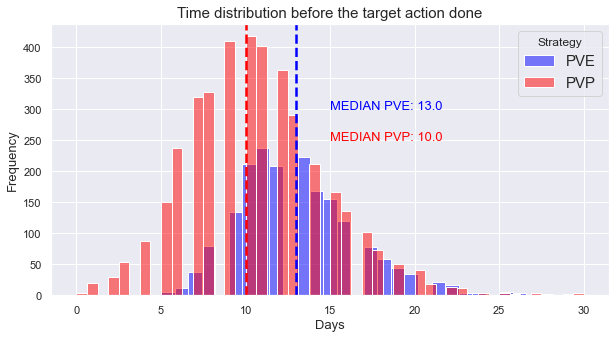

In [81]:
# histogram
plt.figure(figsize=(10,5))
sns.histplot(data=pve, color='blue', alpha=0.5)
sns.histplot(data=pvp, color='red', alpha=0.5)
plt.title('Time distribution before the target action done', fontsize=15)
plt.xlabel('Days', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.legend(title='Strategy', labels=['PVE', 'PVP'], fontsize=15)
plt.axvline(x=pve.median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=pvp.median(), color='red', ls='--', lw=2.5)
plt.text(15, 250, f'MEDIAN PVP: {pvp.median()}', c='red', fontsize=13)
plt.text(15, 300, f'MEDIAN PVE: {pve.median()}', c='blue', fontsize=13);

*Conclusions: the distribution is normal, the median time to complete the level for PVE players is slightly higher (13 days compared to 10 days).*

In [82]:
# number of players for each strategy
print('Number of PVP players', len(pvp))
print('Number of PVE players', len(pve))

Number of PVP players 3951
Number of PVE players 1866


In [83]:
# hypothesis testing
alpha = .05 
results = st.ttest_ind(pve, pvp, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

p-value: 2.6237027268062713e-106
Reject the null hypothesis.


*Conclusions: we accept H1, the average time of passing the level of users of these groups is different.*

## Hypothesis of inequality in the number of constructions depending on the channel of attraction

**Null Hypothesis, H0:** The numbers of buildings of users who came from the Instagram channel is and from the Yandex channel are the same. 
**Alternative Hypothesis, H1:** The numbers of buildings of users in these groups are different. 
The level of siginificance is 0.05.

In [84]:
# filter building events 
buildings = game_actions.query('event == "building"')
# number of buildings table
b_count = (buildings
           .groupby('user_id')
           .agg({'user_id':'count'})
           .rename(columns={'user_id':'b_count'})
           .reset_index())
# join number of buildings and source
b_count = b_count.merge(user_profiles[['user_id', 'source']], how='right', on='user_id')
# separate two channels
instagram = b_count.query('source == "instagram"')['b_count']
yandex = b_count.query('source == "yandex"')['b_count']

In [85]:
# statistics of building number
print('\033[1;30;47m_____________INSTAGRAM_____________\033[0;0m\n', instagram.describe().loc[['mean', 'std']])
print('Variance:', round(np.var(instagram, ddof=1), 2))
print('\033[1;30;47m_____________YANDEX_____________\033[0;0m\n', yandex.describe().loc[['mean', 'std']])
print('Variance:', round(np.var(yandex, ddof=1), 2))

_____________INSTAGRAM_____________
 mean    9.505527
std     3.830176
Name: b_count, dtype: float64
Variance: 14.67
_____________YANDEX_____________
 mean    9.348557
std     3.860250
Name: b_count, dtype: float64
Variance: 14.9


In [86]:
# check for variance difference
print('Различие дисперсий {d:.2f} %'.format(d=100 - np.var(instagram, ddof=1)/
                                            np.var(yandex, ddof=1)*100))

Различие дисперсий 1.55 %


*Conclusion: set the parameter equal_var = True.*

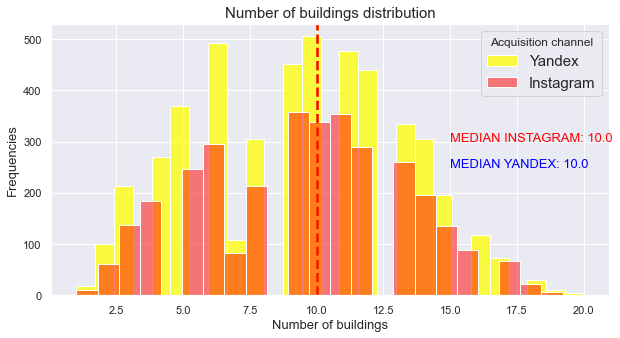

In [87]:
# histogram
plt.figure(figsize=(10,5))
sns.histplot(data=yandex, color='yellow')
sns.histplot(data=instagram, color='red', alpha=0.5)
plt.title('Number of buildings distribution', fontsize=15)
plt.xlabel('Number of buildings', fontsize=13)
plt.ylabel('Frequencies', fontsize=13)
plt.legend(title='Acquisition channel', labels=['Yandex', 'Instagram'], fontsize=15)
plt.axvline(x=yandex.median(), color='yellow', ls='--', lw=2.5)
plt.axvline(x=instagram.median(), color='red', ls='--', lw=2.5)
plt.text(15, 250, f'MEDIAN YANDEX: {yandex.median()}', c='blue', fontsize=13)
plt.text(15, 300, f'MEDIAN INSTAGRAM: {instagram.median()}', c='red', fontsize=13);

*Conclusions: data is distributed normally, medians are similar.*

In [88]:
# number of users from each channel
print('Number of users from instagram', len(instagram))
print('Number of users from yandex', len(yandex))

Number of users from instagram 3347
Number of users from yandex 4817


In [89]:
# hypothesis testing
alpha = .05 
results = st.ttest_ind(instagram, yandex, equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

p-value: 0.06989780662351841
Fail to reject the null hypothesis.


*Conclusions: the number of constructions for users who came from the Instagram channel does not differ from the number of constructions of users who came from the Yandex channel.*

## Interim conclusions

- when checking the two-sided hypothesis of inequality of the time spent on the level depending on the strategy, H1 is accepted: the average time spent on the level of PVP and PVE groups is different; 
- when checking the two-sided hypothesis of inequality of the number of buildings depending on the channel of attraction (instagram and yandex), it was not possible to reject H0: the number of buildings of users who came from the instagram channel does not differ from the number of buildings of users who came from the yandex channel.

# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project, we acted as analysts for the mobile game "Space Brothers". We analyzed the data of the first users of the application - cohorts of users who started using the application from May 4th to 10th inclusive. The target event of this research is to complete the first level. We formed a monetization model for the game application based on the results of the data research, created a presentation based on the research results, and reflected the target event in the form of a dynamic dashboard.


    
**Main actions in the data preprocessing:**

- replaced the data type (converted to datetime type);
- checked the dates for correctness (minimum and maximum values);
- evaluated the distribution of expenses for the advertising campaign;
- checked the categorical data for implicit duplicates (unique values);
- analyzed the missing values (no processing required);
    
**In the EDA section, user profiles were created with the following features:**

- Completion of the first level;
- Strategy: PVP\PVE;
- Dates: first and last activity in the application, completion of the first level;
- Time spent in the game, time to get the first level;
    
    
**Game Platform**

We analyzed the activity of 13576 unique users attracted during the period from 4 to 10 May 2020. The user activity data from 4 May to 5 June 2020.

- The number of users and, accordingly, game events increased during the attraction and then gradually decreased. By the end of the analyzed period, almost all attracted users were inactive;
- The maximum number of unique users and the number of events are observed on the last day of the advertising campaign (10.05.2020) - 9219 people and 15208 events, the minimum on the last day of the analyzed period (05.06.2020) - 4 people and 5 events;
- The average number of events per day is 4110;
- The most frequent event in the game is building (127957 times), completing the first level - 5817 times, implementing the project - 1866 times;
- The main game strategy is to build in the beginning to collect resources, then implement the project and then take action to complete the first level. The number of project implementations is significantly lower than the number of level completion events, which indirectly indicates a large proportion of players who chose a strategy to win over the player. After May 25, users are practically inactive for all types of events;
- Players build assembly_shop and spaceport (which relates to PVP strategy) almost equally often (54494 and 59325 times respectively). Much less often was built research_center (14138 times), which is characteristic of PVE strategy and project implementation;
- Assembly_shop is built exclusively at the beginning of the game (the first 7 days), spaceport and research_center are closer to the middle of the game (some players also build spaceport from the first days of the game).
    
*Analysis of the impact of events on the completion of the target (completion of the first level).*

- The proportion of players who completed the target event was 42.85%, of which 67.92% were PVP players and 32.08% were PVE players;
- 5817 players completed the target event, the record time was on the day of the game launch, the maximum was 30 days, the average time to get the first level was 11 days;
- First level players spent an average of two more days in the game (9 vs 11 days). The highest average was for PVE players (13 days). The intermediate average for PVP players (10 days). The PVP strategy seems to be easier and less time consuming for the user;
- The average number of buildings for PVE players is 12 buildings per player versus 10 for PVP players. On average, first level users have an intermediate value of 11 buildings per player;
- Players who did not pass the first level build fewer - 8 buildings per player.

*Cohort analysis*

For the calculation of the lifetime value, any event from the game_actions table was taken as an indicator of activity. The customer did not provide data on sessions. For the moment of analysis, we consider June 10, 2020, the horizon is 14 days.

- On the heat map and retention curves, we observe good indicators up to 6 lifetimes (from 40% to 60%), which sharply drop to the 7th day (by half, from 20% to 40%). Perhaps this is influenced by the end of the advertising campaign;
- Retention of the first day decreases for cohorts attracted to the end of the campaign on May 9 and 10 (for the last cohort more than half, 21% versus 53%);
- Retention at the end of the analyzed period is about 10% for all cohorts;
- Retention of users who performed the target action is slightly higher, but for the cohort attracted on May 6 the situation is reversed - retention of users who did not complete the first level is higher;
- Retention of PVE players is higher than that of PVP players;
- The dynamics of retention is almost the same for all attraction channels.

**Advertising campaign**

Total spent on advertising: 7603.58 USD (period from 4th to 10th of May).

- The main part of the funds was spent on the first day of the campaign, and the expenses gradually decreased; - At the beginning of the campaign, the expenses on Yandex were slightly higher, but then they were equal to the expenses on Facebook and Instagram channels. The expenses for attracting from the YouTube channel are the lowest and amount to approximately half of the indicators for other channels;
- The most users came from the Yandex channel - 4817 people, then Instagram - 3347 people. The other channels attracted from 2600 to 2800 people;
- The number of attracted users on the first day of the campaign was the highest - 5860 people, on the last day of the campaign the minimum was 271 people.
- The Yandex channel is the leader in the number of attracted users throughout the entire advertising campaign;
- The most expensive users come from the Facebook advertising network, followed by Instagram.
- The average CAC for all channels is quite stable in dynamics;
- Attracting one user from the Facebook advertising network cost the company an average of 78 cents, and from YouTube - about twice as less - 40 cents.
    
**Monetization Strategy and Return on Investment**

Based on the results of the EDA, the option of displaying ads before building selection was chosen as the main one. The income from advertising with such a strategy will be: 8957 USD. Evaluated LTV and ROI:

- Weekly LTV of users was 49 cents, by the end of the second week 63 cents;
- LTV of users who performed the target action is higher. LTV of PVE users is slightly higher, but PVP users lag slightly (despite the fact that this strategy does not assume such active construction as the PVE sector, the income from this category of users on buildings is approximately at the same level);
- LTV of the first day changes insignificantly, and LTV of the 7th and 10th day fluctuates and grows slightly.
- The LTV curve has a similar character for all sources of attraction;

*ROI Analysis:*

- Advertising on Yandex and YouTube paid off by the 5th and 6th lifetime, and by the end of the analyzed period it paid off by 160%, advertising on Instagram almost paid off by the end of the analyzed period, but advertising on Facebook did not pay off at all.
    
    
**Statistical Hypothesis Testing**

- There are 3951 PVP and 1866 PVE players respectively;
- The median and average completion time of the PVP level is 10 days, which is 3 days less than the corresponding values for PVE players;
- According to the two-sided test, the average completion time of the level of users of these groups is different (significance level - 5%).
_________
- The number of players from Yandex and Instagram channels is 4817 and 3347 respectively;
- The median and average number of builds of these player categories is around 10 (the medians are the same);
- The number of builds of users who came from the Instagram channel does not differ from the number of builds of users who came from the Yandex channel (significance level - 5%).